In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('letters.csv')

In [3]:
df.head()

lettr  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0     T      2      8      3     5      1      8     13      0      6      6   
1     I      5     12      3     7      2     10      5      5      4     13   
2     D      4     11      6     8      6     10      6      2      6     10   
3     N      7     11      6     6      3      5      9      4      6      4   
4     G      2      1      3     1      1      8      6      6      6      6   

   x2ybar  xy2bar  x-ege  xegvy  y-ege  yegvx  
0      10       8      0      8      0      8  
1       3       9      2      8      4     10  
2       3       7      3      7      3      9  
3       4      10      6     10      2      8  
4       5       9      1      7      5     10

In [4]:
df.tail()

lettr  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  \
19995     D      2      2      3     3      2      7      7      7      6   
19996     C      7     10      8     8      4      4      8      6      9   
19997     T      6      9      6     7      5      6     11      3      7   
19998     S      2      3      4     2      1      8      7      2      6   
19999     A      4      9      6     6      2      9      5      3      1   

       xybar  x2ybar  xy2bar  x-ege  xegvy  y-ege  yegvx  
19995      6       6       4      2      8      3      7  
19996     12       9      13      2      9      3      7  
19997     11       9       5      2     12      2      4  
19998     10       6       8      1      9      5      8  
19999      8       1       8      2      7      2      8

In [5]:
df.shape

(20000, 17)

In [6]:
df.describe(include='all')

lettr         x-box         y-box         width         high  \
count   20000  20000.000000  20000.000000  20000.000000  20000.00000   
unique     26           NaN           NaN           NaN          NaN   
top         U           NaN           NaN           NaN          NaN   
freq      813           NaN           NaN           NaN          NaN   
mean      NaN      4.023550      7.035500      5.121850      5.37245   
std       NaN      1.913212      3.304555      2.014573      2.26139   
min       NaN      0.000000      0.000000      0.000000      0.00000   
25%       NaN      3.000000      5.000000      4.000000      4.00000   
50%       NaN      4.000000      7.000000      5.000000      6.00000   
75%       NaN      5.000000      9.000000      6.000000      7.00000   
max       NaN     15.000000     15.000000     15.000000     15.00000   

               onpix         x-bar         y-bar         x2bar         y2bar  \
count   20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        3.505850      6.897600      7.500450      4.628600      5.178650   
std         2.190458      2.026035      2.325354      2.699968      2.380823   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         2.000000      6.000000      6.000000      3.000000      4.000000   
50%         3.000000      7.000000      7.000000      4.000000      5.000000   
75%         5.000000      8.000000      9.000000      6.000000      7.000000   
max        15.000000     15.000000     15.000000     15.000000     15.000000   

               xybar       x2ybar        xy2bar         x-ege         xegvy  \
count   20000.000000  20000.00000  20000.000000  20000.000000  20000.000000   
unique           NaN          NaN           NaN           NaN           NaN   
top              NaN          NaN           NaN           NaN           NaN   
freq             NaN          NaN           NaN           NaN           NaN   
mean        8.282050      6.45400      7.929000      3.046100      8.338850   
std         2.488475      2.63107      2.080619      2.332541      1.546722   
min         0.000000      0.00000      0.000000      0.000000      0.000000   
25%         7.000000      5.00000      7.000000      1.000000      8.000000   
50%         8.000000      6.00000      8.000000      3.000000      8.000000   
75%        10.000000      8.00000      9.000000      4.000000      9.000000   
max        15.000000     15.00000     15.000000     15.000000     15.000000   

               y-ege        yegvx  
count   20000.000000  20000.00000  
unique           NaN          NaN  
top              NaN          NaN  
freq             NaN          NaN  
mean        3.691750      7.80120  
std         2.567073      1.61747  
min         0.000000      0.00000  
25%         2.000000      7.00000  
50%         3.000000      8.00000  
75%         5.000000      9.00000  
max        15.000000     15.00000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [8]:
df.columns

Index(['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'x-ege', 'xegvy',
       'y-ege', 'yegvx'],
      dtype='object')

In [9]:
df.rename(columns={'x-box':'x_box','y-box':'y_box','x-bar':'x_bar','y-bar':'y_bar','x-ege':'x_ege','y-ege':'y_ege'},inplace=True)

In [10]:
df.columns

Index(['lettr', 'x_box', 'y_box', 'width', 'high', 'onpix', 'x_bar', 'y_bar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'x_ege', 'xegvy',
       'y_ege', 'yegvx'],
      dtype='object')

In [11]:
df.duplicated().sum()

1332

In [12]:
df.isnull().sum()

lettr     0
x_box     0
y_box     0
width     0
high      0
onpix     0
x_bar     0
y_bar     0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
x_ege     0
xegvy     0
y_ege     0
yegvx     0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
 1   x_box   20000 non-null  int64 
 2   y_box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x_bar   20000 non-null  int64 
 7   y_bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  x_ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y_ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


<AxesSubplot:xlabel='x_box'>

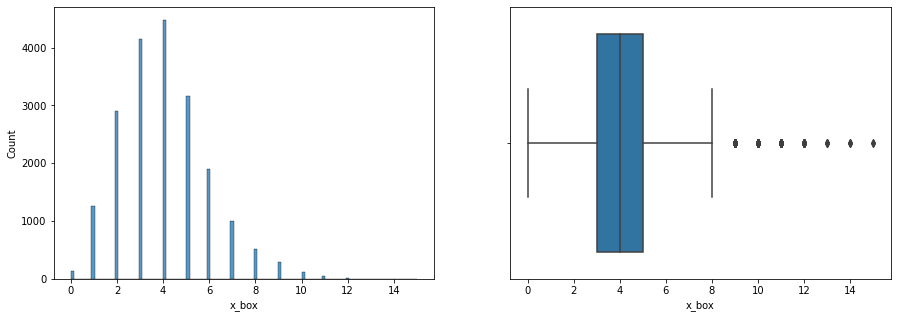

In [14]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='x_box', data=df, ax=axs[0])
sns.boxplot(x='x_box', data=df,ax=axs[1])

<AxesSubplot:xlabel='y_box'>

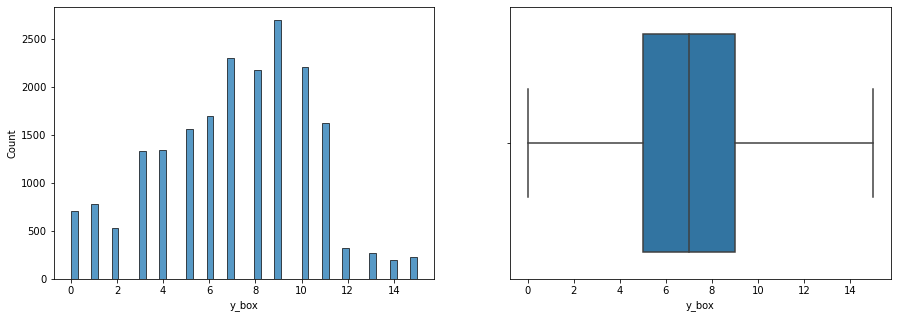

In [15]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='y_box', data=df, ax=axs[0])
sns.boxplot(x='y_box', data=df,ax=axs[1])

<AxesSubplot:xlabel='width'>

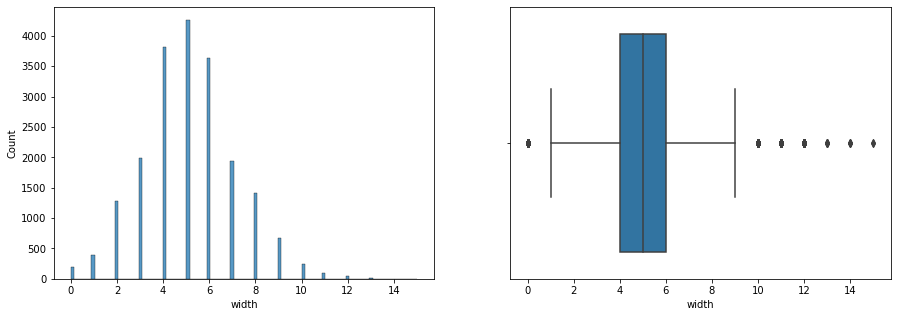

In [16]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='width', data=df, ax=axs[0])
sns.boxplot(x='width', data=df,ax=axs[1])

<AxesSubplot:xlabel='high'>

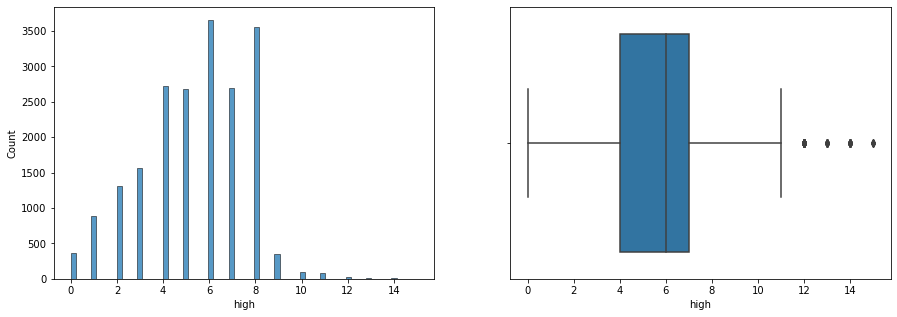

In [17]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='high', data=df, ax=axs[0])
sns.boxplot(x='high', data=df,ax=axs[1])

<AxesSubplot:xlabel='onpix'>

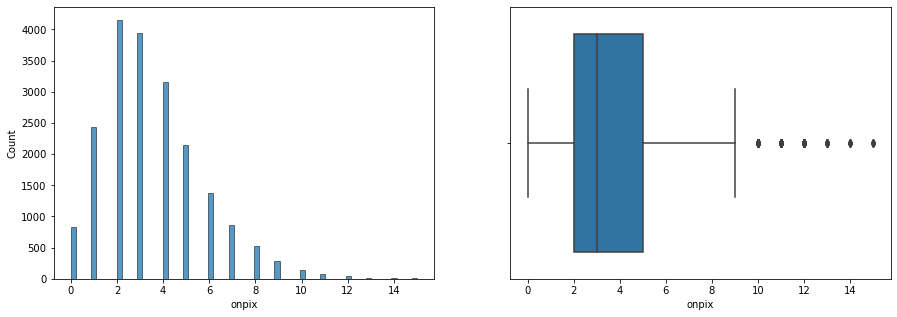

In [18]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='onpix', data=df, ax=axs[0])
sns.boxplot(x='onpix', data=df,ax=axs[1])

<AxesSubplot:xlabel='x_bar'>

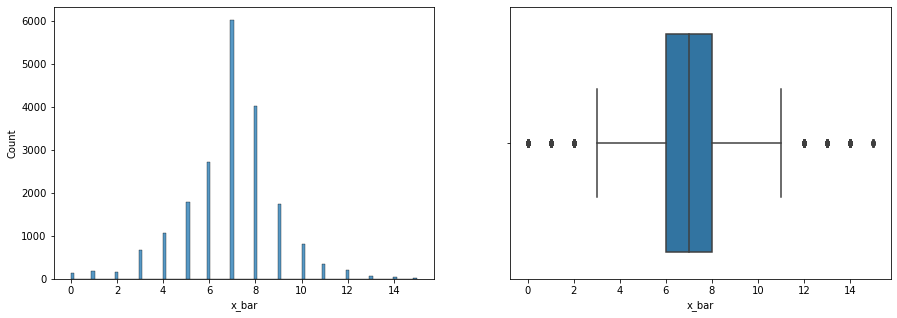

In [19]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='x_bar', data=df, ax=axs[0])
sns.boxplot(x='x_bar', data=df,ax=axs[1])

<AxesSubplot:xlabel='y_bar'>

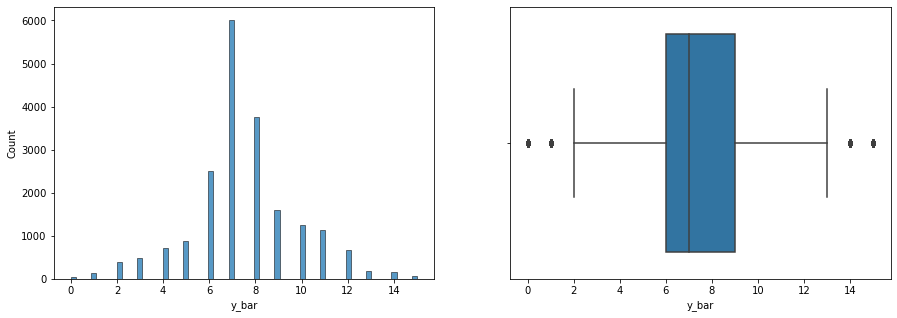

In [20]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='y_bar', data=df, ax=axs[0])
sns.boxplot(x='y_bar', data=df,ax=axs[1])

<AxesSubplot:xlabel='x2bar'>

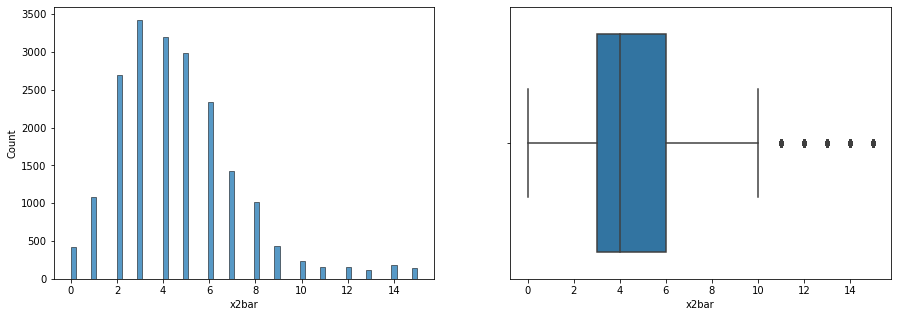

In [21]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='x2bar', data=df, ax=axs[0])
sns.boxplot(x='x2bar', data=df,ax=axs[1])

<AxesSubplot:xlabel='y2bar'>

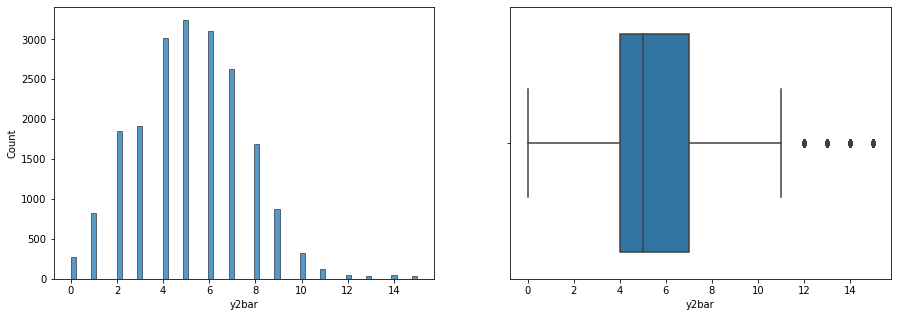

In [22]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='y2bar', data=df, ax=axs[0])
sns.boxplot(x='y2bar', data=df,ax=axs[1])

<AxesSubplot:xlabel='xybar'>

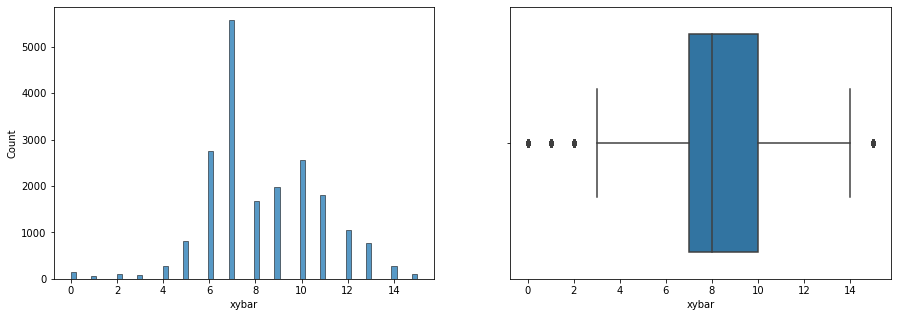

In [23]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='xybar', data=df, ax=axs[0])
sns.boxplot(x='xybar', data=df,ax=axs[1])

<AxesSubplot:xlabel='x2ybar'>

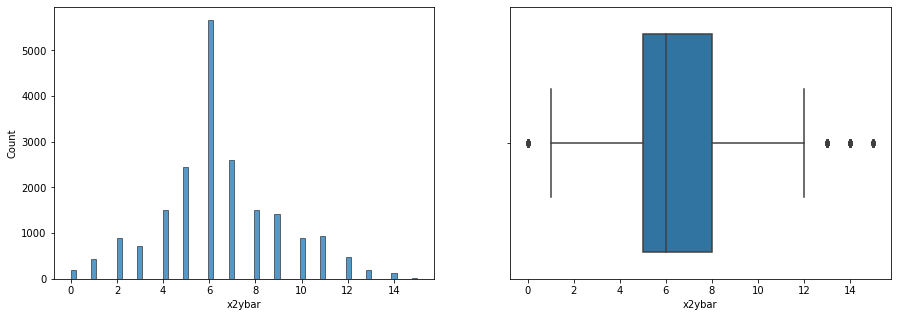

In [24]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='x2ybar', data=df, ax=axs[0])
sns.boxplot(x='x2ybar', data=df,ax=axs[1])

<AxesSubplot:xlabel='xy2bar'>

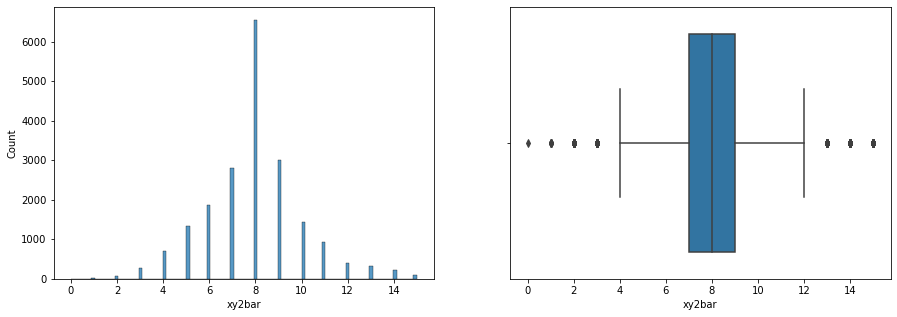

In [25]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='xy2bar', data=df, ax=axs[0])
sns.boxplot(x='xy2bar', data=df,ax=axs[1])

<AxesSubplot:xlabel='x_ege'>

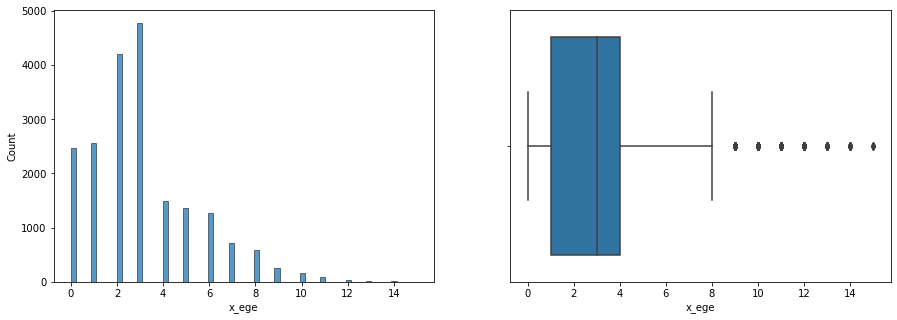

In [26]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='x_ege', data=df, ax=axs[0])
sns.boxplot(x='x_ege', data=df,ax=axs[1])

<AxesSubplot:xlabel='xegvy'>

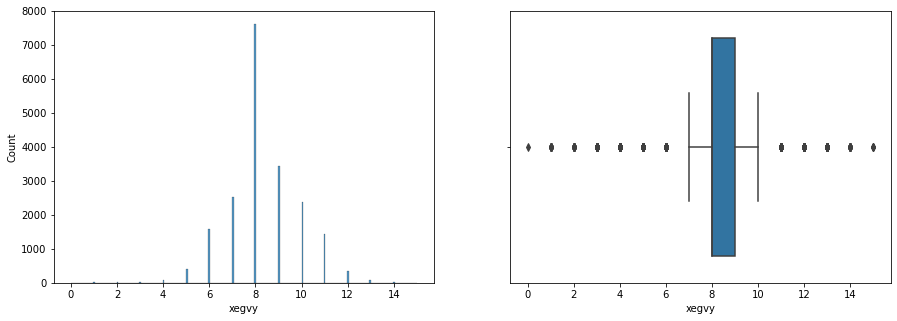

In [27]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='xegvy', data=df, ax=axs[0])
sns.boxplot(x='xegvy', data=df,ax=axs[1])

<AxesSubplot:xlabel='y_ege'>

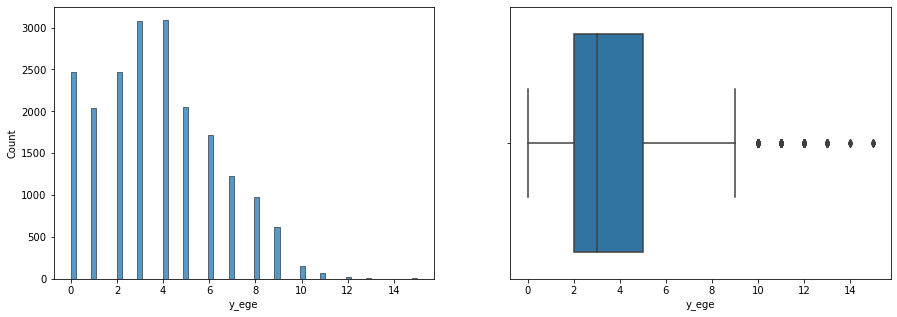

In [28]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='y_ege', data=df, ax=axs[0])
sns.boxplot(x='y_ege', data=df,ax=axs[1])

<AxesSubplot:xlabel='yegvx'>

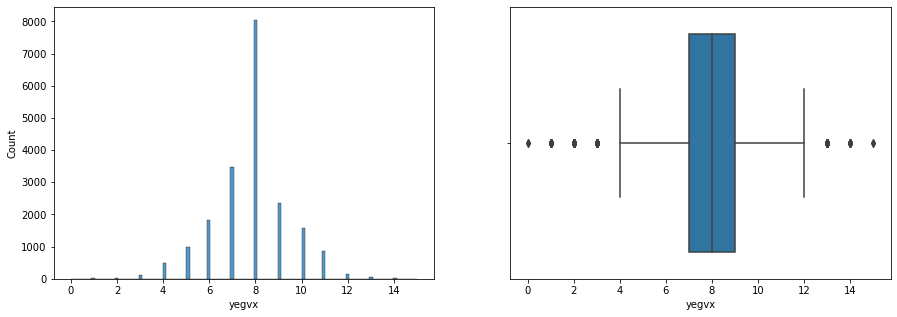

In [29]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='yegvx', data=df, ax=axs[0])
sns.boxplot(x='yegvx', data=df,ax=axs[1])

Observation:
Numeric fields - 'width','x_bar','y_bar','y2bar','xybar','x2ybar' and 'xegvy' show a symmetrical distribution. 'x_box','onpix','x2bar','x_ege' and 'y_ege' is right skew. 'y_box','high','xy2bar' and yegvx 'y_box' do not have any outliers. 'width','x_bar','y_bar','xybar','x2ybar','xy2bar','xegvy'and 'yegvx' both side of outliers. 'x_box','high','onpix','x2bar','y2bar','x_ege', and 'y_ege' have any outliers.

<AxesSubplot:xlabel='lettr', ylabel='count'>

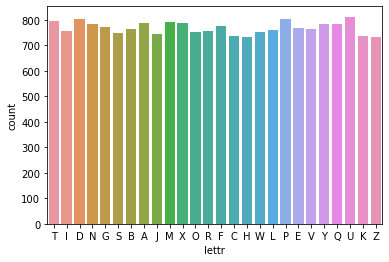

In [30]:
sns.countplot(x='lettr',data=df)

Maximum is 840 value lettr of U.

In [31]:
df_num = df.select_dtypes(exclude='object')
num_list = df_num.columns
num_list

Index(['x_box', 'y_box', 'width', 'high', 'onpix', 'x_bar', 'y_bar', 'x2bar',
       'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'x_ege', 'xegvy', 'y_ege',
       'yegvx'],
      dtype='object')

In [32]:
df_cat = df.select_dtypes(include='object')
cat_list = df_cat.columns
cat_list

Index(['lettr'], dtype='object')

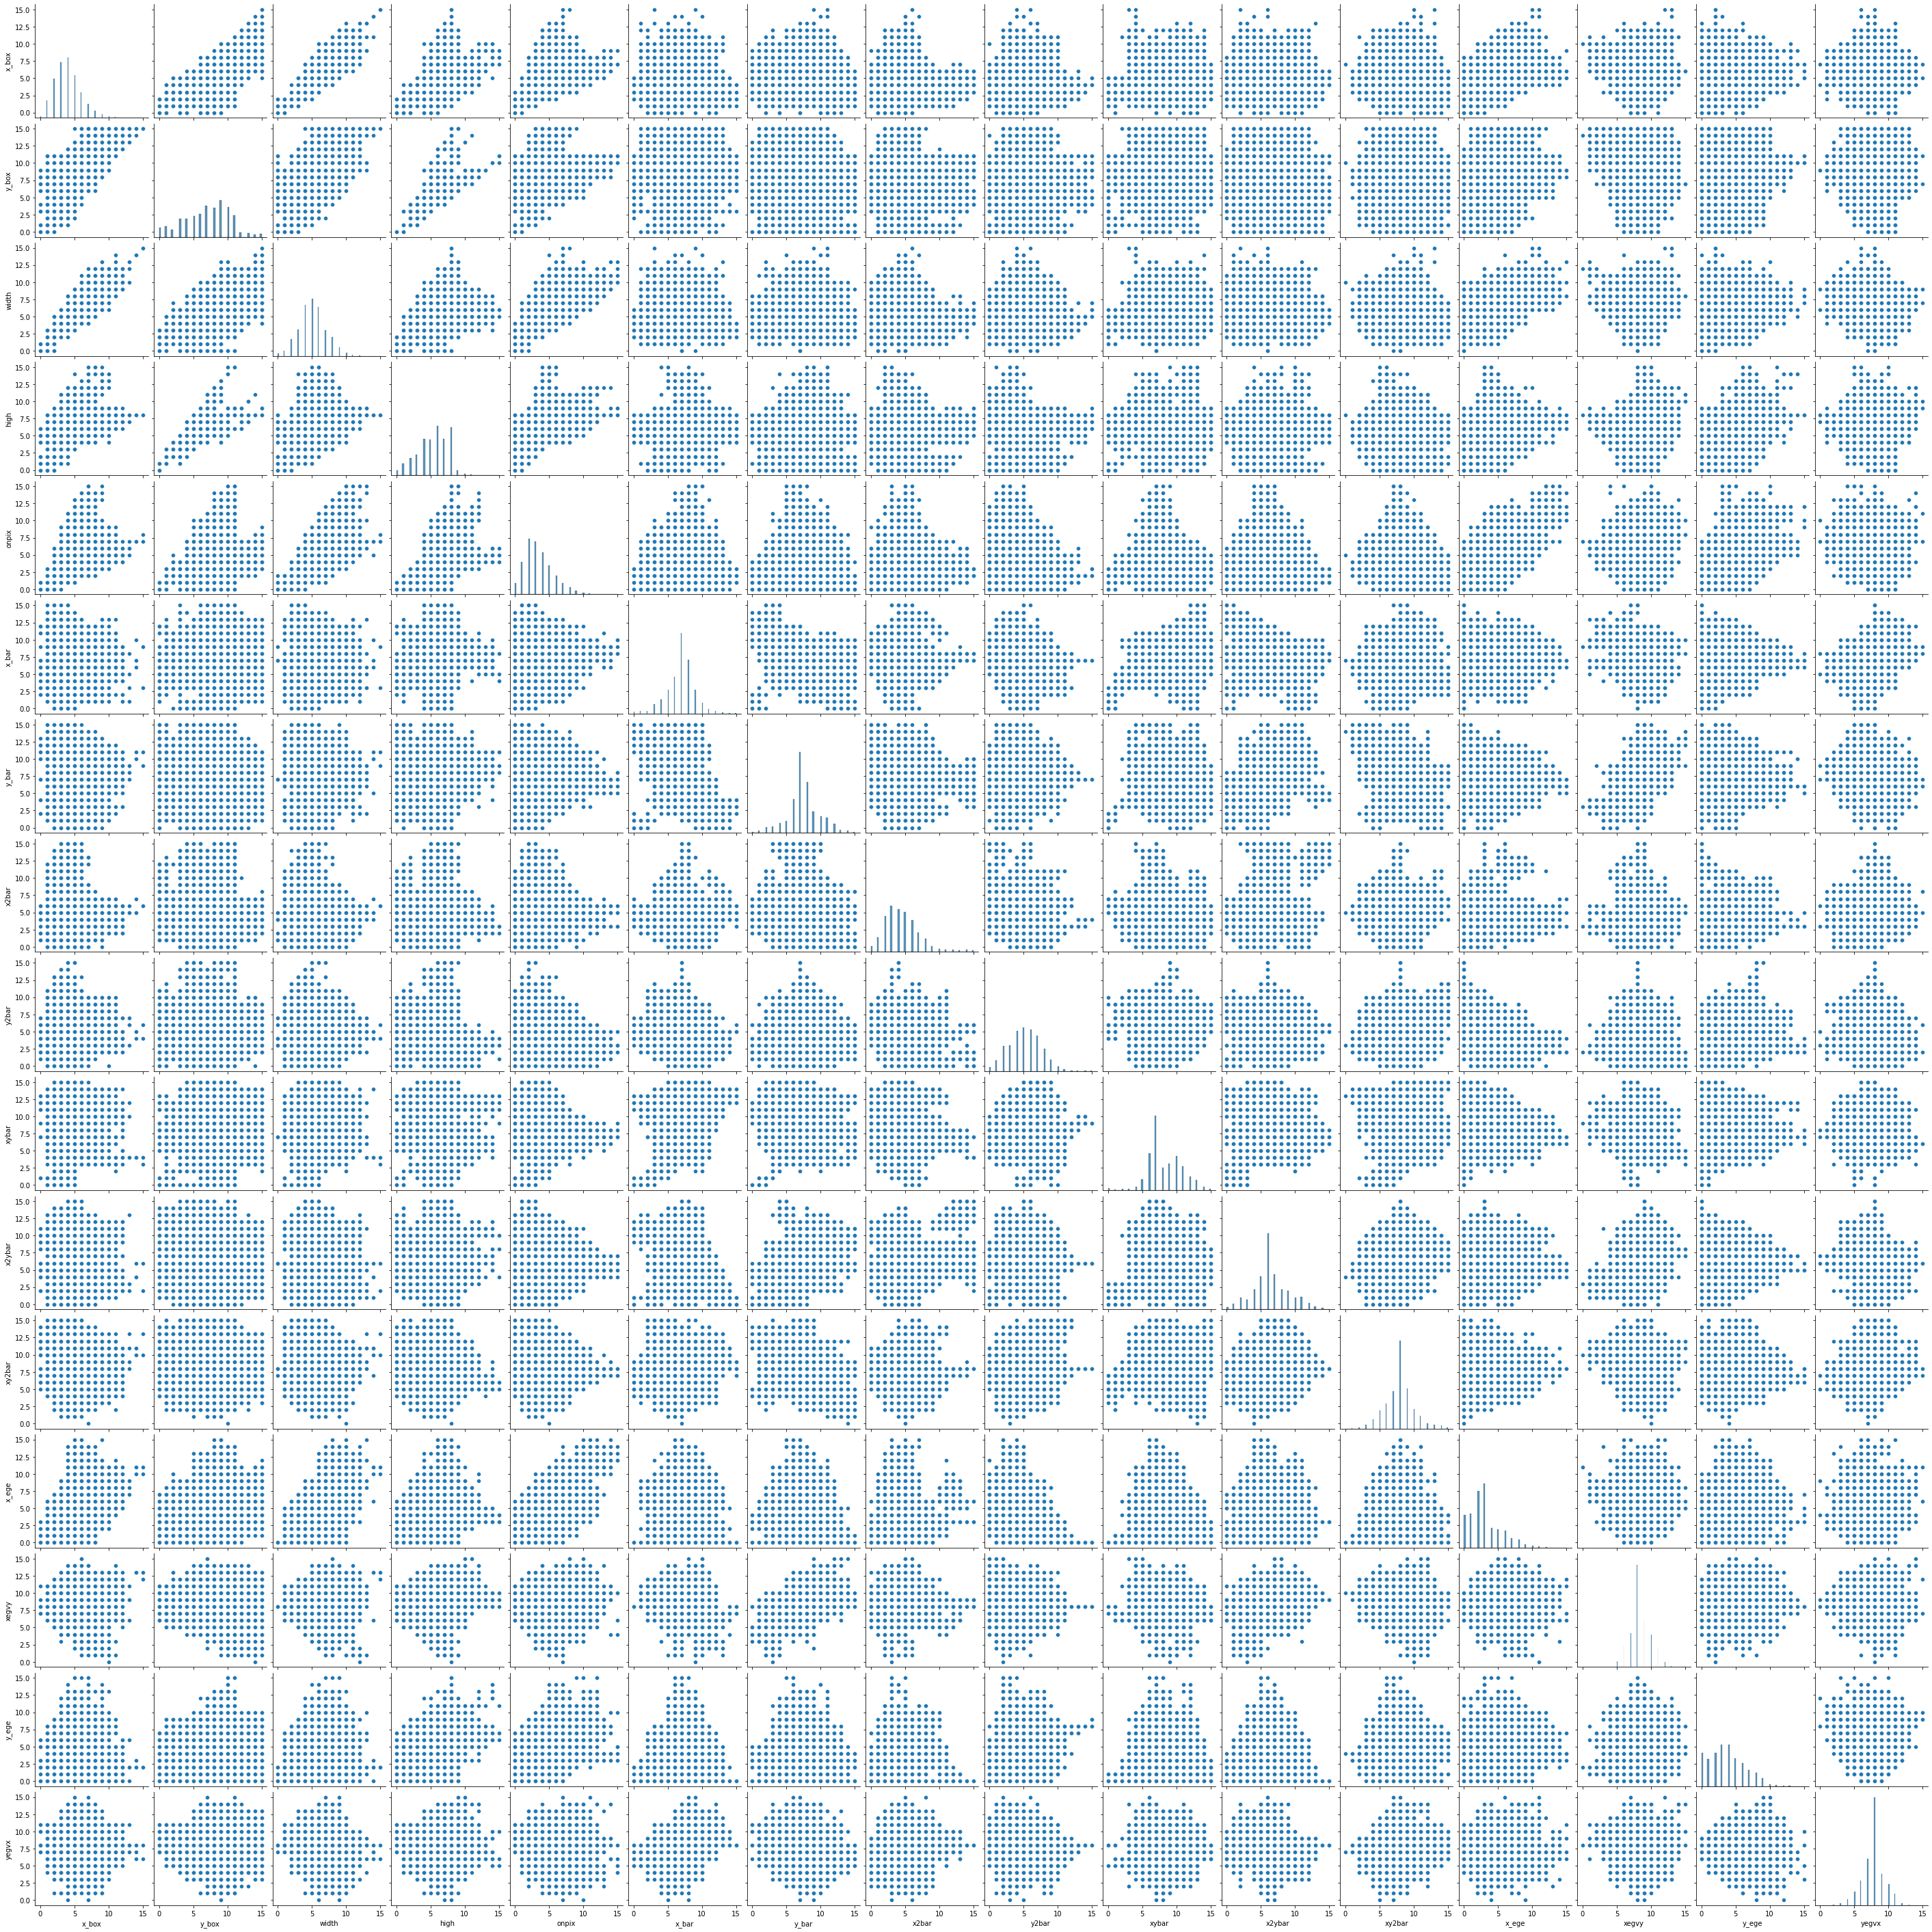

In [33]:
sns.pairplot(vars=num_list,data=df)

Observation:
There is a specific pattern observed between 'x_box' and 'width'. As the 'y2bar' increases, 'x_ege' decreases. Also, it is observed that as the 'x_box' increases cost 'width' also increases.

In [34]:
corr = df.corr(method='pearson')
corr

x_box     y_box     width      high     onpix     x_bar     y_bar  \
x_box   1.000000  0.757793  0.851514  0.672764  0.619097 -0.032595  0.045545   
y_box   0.757793  1.000000  0.671912  0.823207  0.555067  0.045690 -0.040925   
width   0.851514  0.671912  1.000000  0.660215  0.765716  0.061959  0.024832   
high    0.672764  0.823207  0.660215  1.000000  0.644366  0.042844 -0.020072   
onpix   0.619097  0.555067  0.765716  0.644366  1.000000  0.139159 -0.028822   
x_bar  -0.032595  0.045690  0.061959  0.042844  0.139159  1.000000 -0.356580   
y_bar   0.045545 -0.040925  0.024832 -0.020072 -0.028822 -0.356580  1.000000   
x2bar   0.014306 -0.025019 -0.098611  0.082383 -0.011985 -0.053306 -0.118625   
y2bar   0.052086  0.096478  0.057074  0.059032 -0.065557 -0.122851 -0.049658   
xybar   0.148056  0.159954  0.115018  0.012458 -0.069776  0.085963  0.178318   
x2ybar  0.035464 -0.054648  0.011694 -0.011991 -0.072941 -0.341957  0.600397   
xy2bar -0.046333 -0.007568 -0.045009  0.026386 -0.038858 -0.032115 -0.271649   
x_ege   0.489155  0.274431  0.557251  0.265243  0.627507  0.144325 -0.036722   
xegvy   0.098180 -0.001336  0.045658  0.025359  0.017649 -0.253339  0.555060   
y_ege   0.273504  0.230883  0.260285  0.297545  0.492653  0.127056 -0.078008   
yegvx  -0.105147 -0.042741 -0.118273 -0.018853 -0.062969  0.248816 -0.207900   

           x2bar     y2bar     xybar    x2ybar    xy2bar     x_ege     xegvy  \
x_box   0.014306  0.052086  0.148056  0.035464 -0.046333  0.489155  0.098180   
y_box  -0.025019  0.096478  0.159954 -0.054648 -0.007568  0.274431 -0.001336   
width  -0.098611  0.057074  0.115018  0.011694 -0.045009  0.557251  0.045658   
high    0.082383  0.059032  0.012458 -0.011991  0.026386  0.265243  0.025359   
onpix  -0.011985 -0.065557 -0.069776 -0.072941 -0.038858  0.627507  0.017649   
x_bar  -0.053306 -0.122851  0.085963 -0.341957 -0.032115  0.144325 -0.253339   
y_bar  -0.118625 -0.049658  0.178318  0.600397 -0.271649 -0.036722  0.555060   
x2bar   1.000000 -0.188431 -0.317780  0.042545  0.082020  0.142132 -0.084820   
y2bar  -0.188431  1.000000  0.132000 -0.060116  0.119048 -0.384018 -0.052545   
xybar  -0.317780  0.132000  1.000000  0.057988 -0.106759 -0.175676  0.029419   
x2ybar  0.042545 -0.060116  0.057988  1.000000  0.063214  0.053566  0.527239   
xy2bar  0.082020  0.119048 -0.106759  0.063214  1.000000 -0.008753 -0.184927   
x_ege   0.142132 -0.384018 -0.175676  0.053566 -0.008753  1.000000  0.002849   
xegvy  -0.084820 -0.052545  0.029419  0.527239 -0.184927  0.002849  1.000000   
y_ege   0.006546  0.277540 -0.087019 -0.226251  0.049695  0.108411 -0.064402   
yegvx   0.182902 -0.061335 -0.114223 -0.236518  0.245808 -0.049789 -0.187591   

           y_ege     yegvx  
x_box   0.273504 -0.105147  
y_box   0.230883 -0.042741  
width   0.260285 -0.118273  
high    0.297545 -0.018853  
onpix   0.492653 -0.062969  
x_bar   0.127056  0.248816  
y_bar  -0.078008 -0.207900  
x2bar   0.006546  0.182902  
y2bar   0.277540 -0.061335  
xybar  -0.087019 -0.114223  
x2ybar -0.226251 -0.236518  
xy2bar  0.049695  0.245808  
x_ege   0.108411 -0.049789  
xegvy  -0.064402 -0.187591  
y_ege   1.000000  0.143588  
yegvx   0.143588  1.000000

<AxesSubplot:>

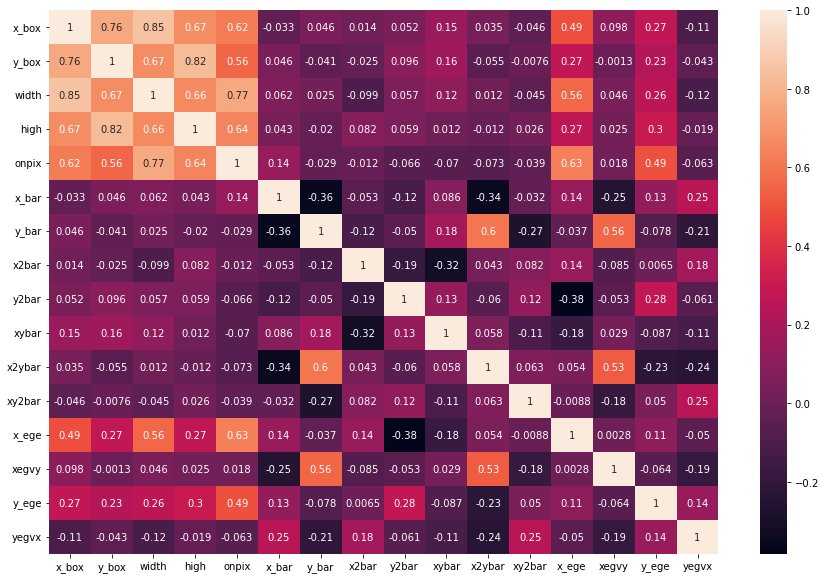

In [35]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr,data=df, annot=True)

Observation
Correlation matrix gives us a similar representation as the pairplot.
We observe a positive correlation between 'x_box' and 'width' and a negative correlation between 'y2bar' and 'x_ege'.
Additionally, there is a strong negative correlation between 'x_bar' and 'y_bar' thus showing multi-collinearity between the independent variables.

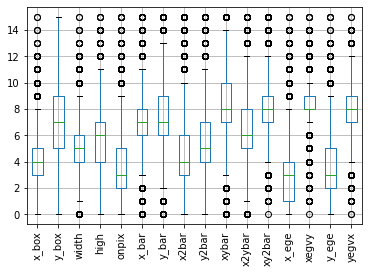

In [36]:
df[num_list].boxplot()
plt.xticks(rotation=90)
plt.show()

In [37]:
x=df.drop('lettr',axis=1)
y=df.lettr

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.3, random_state=123)

In [39]:
X_train.shape

(14000, 16)

In [40]:
X_test.shape

(6000, 16)

In [41]:
X_test.describe()

x_box        y_box        width         high        onpix  \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.000000   
mean      4.035000     7.056167     5.119167     5.383167     3.505667   
std       1.926757     3.317556     2.006814     2.256073     2.192434   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     5.000000     4.000000     4.000000     2.000000   
50%       4.000000     7.000000     5.000000     6.000000     3.000000   
75%       5.000000     9.000000     6.000000     7.000000     5.000000   
max      15.000000    15.000000    15.000000    13.000000    15.000000   

             x_bar        y_bar        x2bar        y2bar        xybar  \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.000000   
mean      6.920167     7.475167     4.599500     5.152333     8.301000   
std       1.982872     2.316883     2.718516     2.364824     2.487723   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000     6.000000     3.000000     4.000000     7.000000   
50%       7.000000     7.000000     4.000000     5.000000     8.000000   
75%       8.000000     8.000000     6.000000     7.000000    10.000000   
max      14.000000    15.000000    15.000000    15.000000    15.000000   

            x2ybar       xy2bar        x_ege        xegvy       y_ege  \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.00000   
mean      6.433667     7.945000     3.075667     8.322833     3.69450   
std       2.622101     2.061395     2.350361     1.555640     2.55485   
min       0.000000     0.000000     0.000000     1.000000     0.00000   
25%       5.000000     7.000000     2.000000     8.000000     2.00000   
50%       6.000000     8.000000     3.000000     8.000000     3.00000   
75%       8.000000     9.000000     4.000000     9.000000     5.00000   
max      15.000000    15.000000    15.000000    15.000000    15.00000   

             yegvx  
count  6000.000000  
mean      7.811167  
std       1.633285  
min       1.000000  
25%       7.000000  
50%       8.000000  
75%       9.000000  
max      15.000000

In [42]:
sclr=StandardScaler()

In [43]:
X_train[num_list]=sclr.fit_transform(X_train[num_list])

In [44]:
X_test[num_list]=sclr.transform(X_test[num_list])

In [45]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


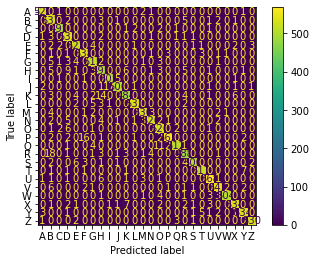

In [46]:
Y_train_pred=KNN_model.predict(X_train)
plot_confusion_matrix(KNN_model,X_train,Y_train)

In [47]:
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       534
           B       0.90      0.97      0.94       547
           C       0.99      0.99      0.99       502
           D       0.94      0.98      0.96       543
           E       0.96      0.97      0.97       538
           F       0.96      0.98      0.97       549
           G       0.96      0.96      0.96       535
           H       0.92      0.93      0.93       530
           I       0.96      0.98      0.97       513
           J       0.98      0.95      0.97       530
           K       0.96      0.93      0.95       518
           L       0.99      0.98      0.98       546
           M       0.98      0.98      0.98       543
           N       0.98      0.96      0.97       547
           O       0.95      0.98      0.96       539
           P       0.99      0.96      0.97       588
           Q       0.99      0.96      0.98       531
           R       0.95    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


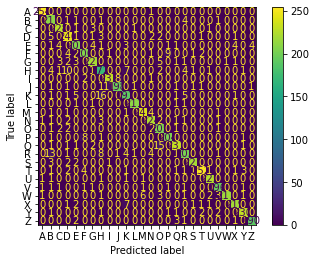

In [48]:
Y_test_pred = KNN_model.predict(X_test)
plot_confusion_matrix(KNN_model,X_test,Y_test)

In [49]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           A       0.98      1.00      0.99       255
           B       0.85      0.96      0.90       219
           C       0.95      0.97      0.96       234
           D       0.89      0.94      0.91       262
           E       0.91      0.90      0.90       230
           F       0.93      0.91      0.92       226
           G       0.94      0.93      0.94       238
           H       0.82      0.84      0.83       204
           I       0.95      0.95      0.95       242
           J       0.96      0.91      0.93       217
           K       0.89      0.86      0.88       221
           L       0.99      0.98      0.98       215
           M       0.97      0.97      0.97       249
           N       0.94      0.95      0.94       236
           O       0.88      0.96      0.92       214
           P       0.94      0.95      0.95       215
           Q       0.95      0.92      0.93       252
           R       0.91    

In [50]:
ac_scores=[]

for k in range(2,30,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    scores = knn.score(X_test,Y_test)
    ac_scores.append(scores)

MCE = [1- x for x in ac_scores]
MCE

[0.06716666666666671,
 0.06033333333333335,
 0.06366666666666665,
 0.0658333333333333,
 0.06633333333333336,
 0.07066666666666666,
 0.07466666666666666,
 0.07966666666666666,
 0.08433333333333337,
 0.08483333333333332,
 0.09050000000000002,
 0.09099999999999997,
 0.09299999999999997,
 0.09716666666666662]

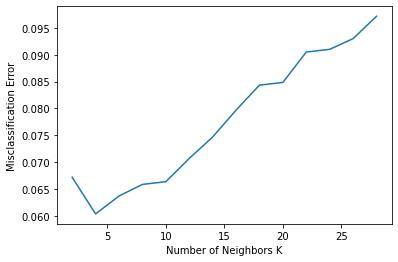

In [51]:
plt.plot(range(2,30,2),MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [52]:
KNN_model1 = KNeighborsClassifier(n_neighbors=4)
KNN_model1.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


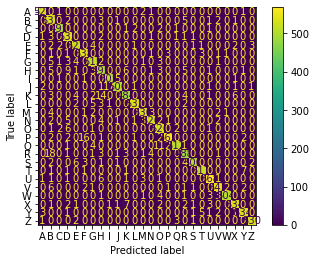

In [53]:
Y_train_pred=KNN_model1.predict(X_train)
plot_confusion_matrix(KNN_model,X_train,Y_train)

In [54]:
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       534
           B       0.92      0.98      0.95       547
           C       0.99      1.00      0.99       502
           D       0.93      0.99      0.96       543
           E       0.94      0.98      0.96       538
           F       0.94      0.99      0.96       549
           G       0.98      0.96      0.97       535
           H       0.93      0.94      0.94       530
           I       0.96      1.00      0.98       513
           J       0.99      0.95      0.97       530
           K       0.96      0.93      0.94       518
           L       0.99      0.98      0.98       546
           M       0.99      0.98      0.98       543
           N       0.99      0.97      0.98       547
           O       0.95      0.97      0.96       539
           P       0.99      0.94      0.96       588
           Q       0.99      0.97      0.98       531
           R       0.96    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


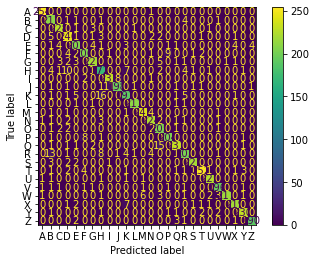

In [55]:
Y_test_pred = KNN_model1.predict(X_test)
plot_confusion_matrix(KNN_model,X_test,Y_test)

In [56]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           A       0.98      1.00      0.99       255
           B       0.86      0.97      0.91       219
           C       0.93      0.97      0.95       234
           D       0.88      0.95      0.92       262
           E       0.89      0.92      0.90       230
           F       0.90      0.95      0.92       226
           G       0.93      0.92      0.93       238
           H       0.82      0.86      0.84       204
           I       0.94      0.97      0.96       242
           J       0.98      0.92      0.95       217
           K       0.88      0.85      0.86       221
           L       0.99      0.98      0.98       215
           M       0.96      0.98      0.97       249
           N       0.96      0.95      0.96       236
           O       0.88      0.95      0.92       214
           P       0.97      0.93      0.95       215
           Q       0.96      0.91      0.93       252
           R       0.92    

Conclusion:-
Overall accuracy of the built KNN regression model is at 94% on the test dataset.
Accuracy in train dataset is at 97% and test dataset is at 94%. As there is not much difference, there is no overfitting in the model.
Considering the evaluation, we can consider the above model as the final one.

In [57]:
svc=SVC()

In [58]:
svc.fit(X_train,Y_train)

SVC()

In [59]:
Y_pred_train=svc.predict(X_train)
Y_pred_test = svc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


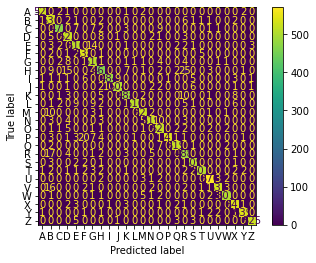

In [60]:
plot_confusion_matrix(svc,X_train,Y_train)

In [61]:
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       534
           B       0.92      0.98      0.95       547
           C       0.99      1.00      0.99       502
           D       0.93      0.99      0.96       543
           E       0.94      0.98      0.96       538
           F       0.94      0.99      0.96       549
           G       0.98      0.96      0.97       535
           H       0.93      0.94      0.94       530
           I       0.96      1.00      0.98       513
           J       0.99      0.95      0.97       530
           K       0.96      0.93      0.94       518
           L       0.99      0.98      0.98       546
           M       0.99      0.98      0.98       543
           N       0.99      0.97      0.98       547
           O       0.95      0.97      0.96       539
           P       0.99      0.94      0.96       588
           Q       0.99      0.97      0.98       531
           R       0.96    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


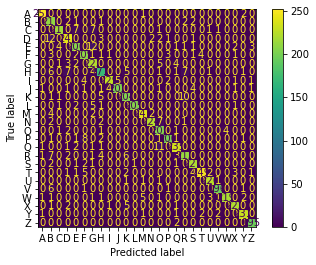

In [62]:
plot_confusion_matrix(svc,X_test,Y_test)

In [63]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           A       0.98      1.00      0.99       255
           B       0.86      0.97      0.91       219
           C       0.93      0.97      0.95       234
           D       0.88      0.95      0.92       262
           E       0.89      0.92      0.90       230
           F       0.90      0.95      0.92       226
           G       0.93      0.92      0.93       238
           H       0.82      0.86      0.84       204
           I       0.94      0.97      0.96       242
           J       0.98      0.92      0.95       217
           K       0.88      0.85      0.86       221
           L       0.99      0.98      0.98       215
           M       0.96      0.98      0.97       249
           N       0.96      0.95      0.96       236
           O       0.88      0.95      0.92       214
           P       0.97      0.93      0.95       215
           Q       0.96      0.91      0.93       252
           R       0.92    

In [64]:
param_grid = {'kernel':['linear','rbf','poly'],'C':[0.001,0.1,1,10,100],'gamma':[0.0001,0.01,0.1,1,10]}
svc1 =  SVC(random_state=123)
grid_search = GridSearchCV(estimator=svc1,param_grid=param_grid,cv=10)

In [65]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=123),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [66]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [67]:
svc1=grid_search.best_estimator_

In [68]:
y_pred_train=svc1.predict(X_train)
y_pred_test=svc1.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


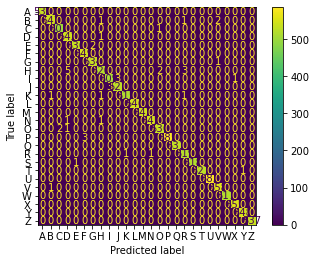

In [69]:
plot_confusion_matrix(svc1,X_train,Y_train)

In [70]:
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       534
           B       0.92      0.98      0.95       547
           C       0.99      1.00      0.99       502
           D       0.93      0.99      0.96       543
           E       0.94      0.98      0.96       538
           F       0.94      0.99      0.96       549
           G       0.98      0.96      0.97       535
           H       0.93      0.94      0.94       530
           I       0.96      1.00      0.98       513
           J       0.99      0.95      0.97       530
           K       0.96      0.93      0.94       518
           L       0.99      0.98      0.98       546
           M       0.99      0.98      0.98       543
           N       0.99      0.97      0.98       547
           O       0.95      0.97      0.96       539
           P       0.99      0.94      0.96       588
           Q       0.99      0.97      0.98       531
           R       0.96    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


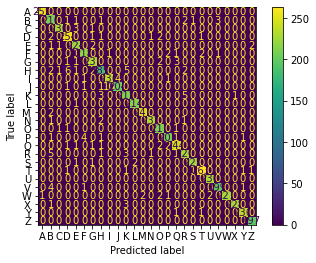

In [71]:
plot_confusion_matrix(svc1,X_test,Y_test)

In [72]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           A       0.98      1.00      0.99       255
           B       0.86      0.97      0.91       219
           C       0.93      0.97      0.95       234
           D       0.88      0.95      0.92       262
           E       0.89      0.92      0.90       230
           F       0.90      0.95      0.92       226
           G       0.93      0.92      0.93       238
           H       0.82      0.86      0.84       204
           I       0.94      0.97      0.96       242
           J       0.98      0.92      0.95       217
           K       0.88      0.85      0.86       221
           L       0.99      0.98      0.98       215
           M       0.96      0.98      0.97       249
           N       0.96      0.95      0.96       236
           O       0.88      0.95      0.92       214
           P       0.97      0.93      0.95       215
           Q       0.96      0.91      0.93       252
           R       0.92    

Conclusion:-
Overall accuracy of the built SVM regression model is at 94% on the test dataset.
Accuracy in train dataset is at 97% and test dataset is at 94%. As there is not much difference, there is no overfitting in the model.
Considering the evaluation, we can consider the above model as the final one.

straight lines

In [73]:
df1=df[(df['lettr']=='A')|(df['lettr']=='E')|(df['lettr']=='F')|(df['lettr']=='H')|(df['lettr']=='I')|(df['lettr']=='K')|(df['lettr']=='L')|(df['lettr']=='M')|(df['lettr']=='N')|(df['lettr']=='T')|(df['lettr']=='V')|(df['lettr']=='W')|(df['lettr']=='X')|(df['lettr']=='Y')|(df['lettr']=='Z')]

<AxesSubplot:xlabel='x_box'>

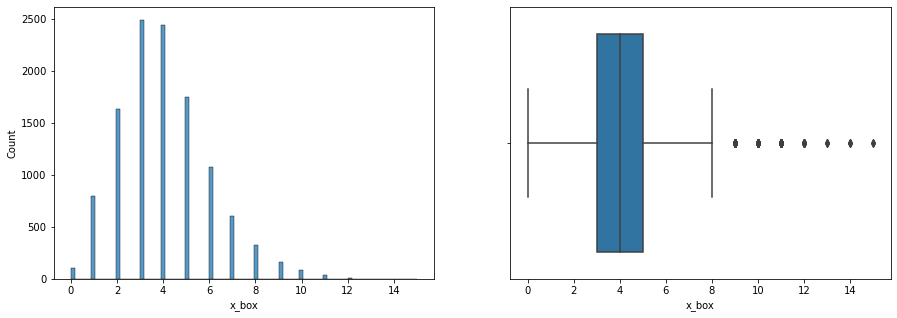

In [74]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='x_box', data=df1, ax=axs[0])
sns.boxplot(x='x_box', data=df1,ax=axs[1])

<AxesSubplot:xlabel='y_box'>

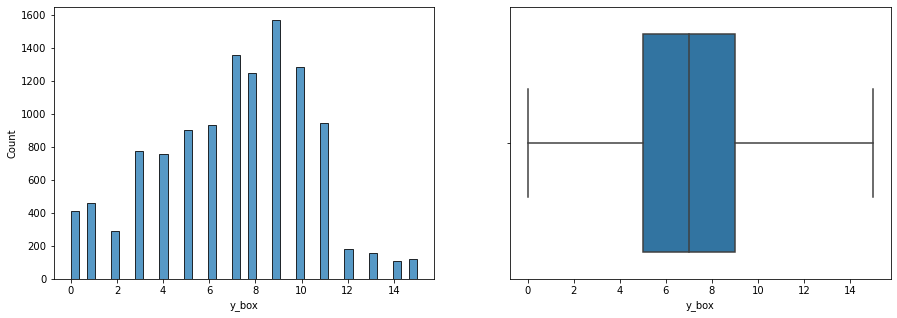

In [75]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='y_box', data=df1, ax=axs[0])
sns.boxplot(x='y_box', data=df1,ax=axs[1])

<AxesSubplot:xlabel='width'>

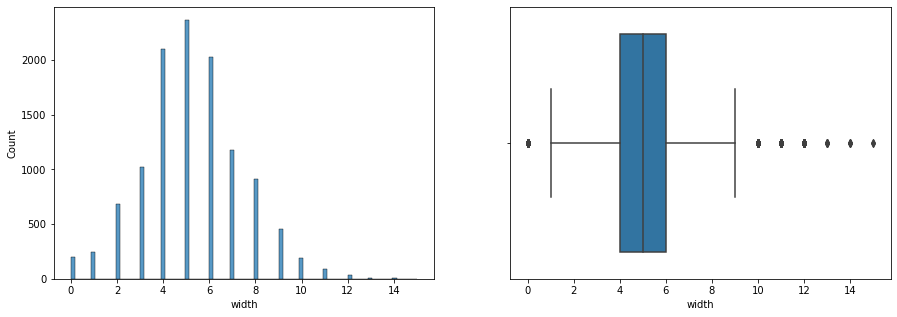

In [76]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='width', data=df1, ax=axs[0])
sns.boxplot(x='width', data=df1,ax=axs[1])

<AxesSubplot:xlabel='high'>

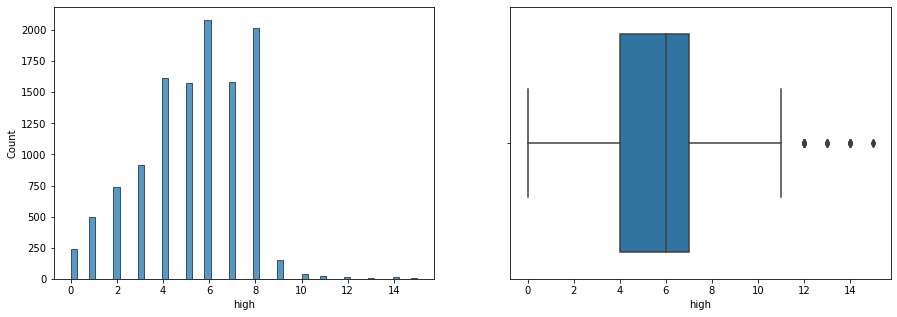

In [77]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='high', data=df1, ax=axs[0])
sns.boxplot(x='high', data=df1,ax=axs[1])

<AxesSubplot:xlabel='onpix'>

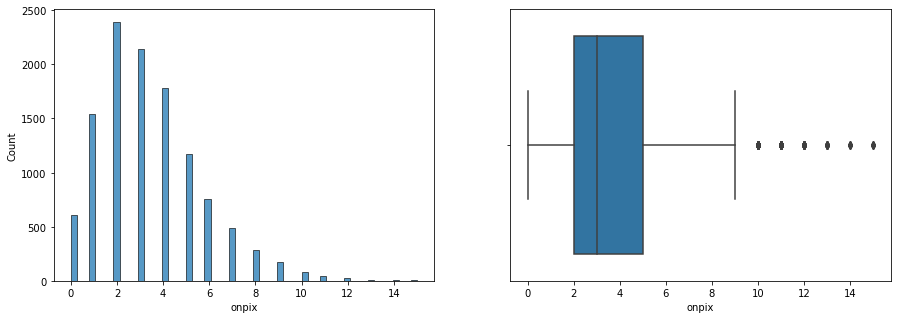

In [78]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='onpix', data=df1, ax=axs[0])
sns.boxplot(x='onpix', data=df1,ax=axs[1])

<AxesSubplot:xlabel='x_bar'>

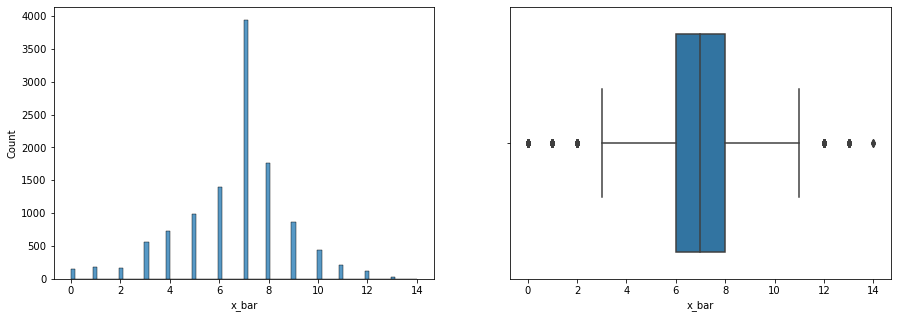

In [79]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='x_bar', data=df1, ax=axs[0])
sns.boxplot(x='x_bar', data=df1,ax=axs[1])

<AxesSubplot:xlabel='y_bar'>

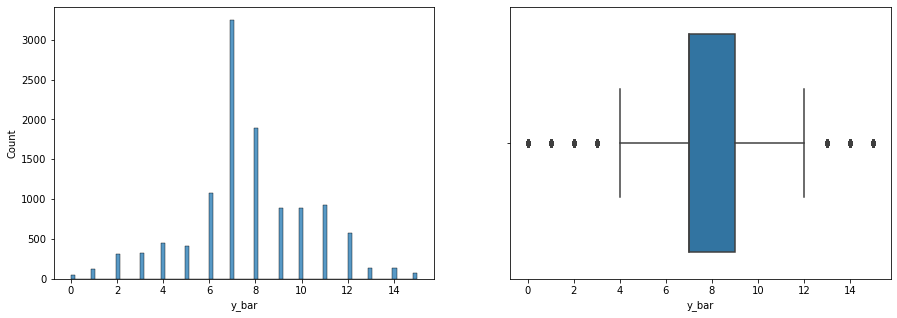

In [80]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='y_bar', data=df1, ax=axs[0])
sns.boxplot(x='y_bar', data=df1,ax=axs[1])

<AxesSubplot:xlabel='x2bar'>

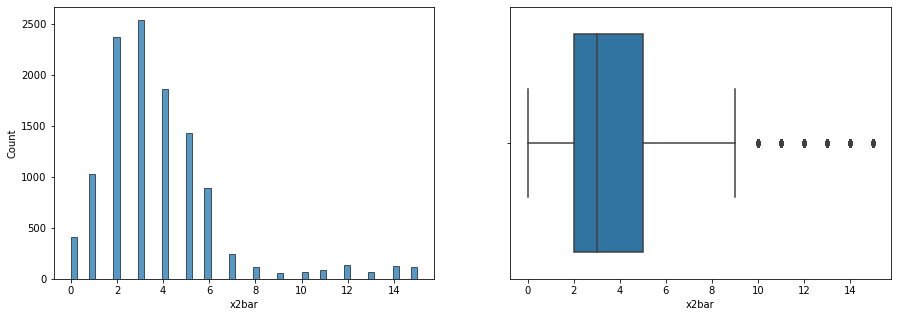

In [81]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='x2bar', data=df1, ax=axs[0])
sns.boxplot(x='x2bar', data=df1,ax=axs[1])

<AxesSubplot:xlabel='y2bar'>

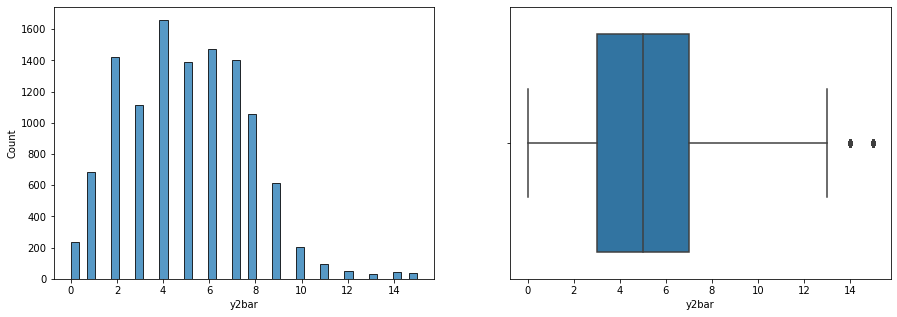

In [82]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='y2bar', data=df1, ax=axs[0])
sns.boxplot(x='y2bar', data=df1,ax=axs[1])

<AxesSubplot:xlabel='xybar'>

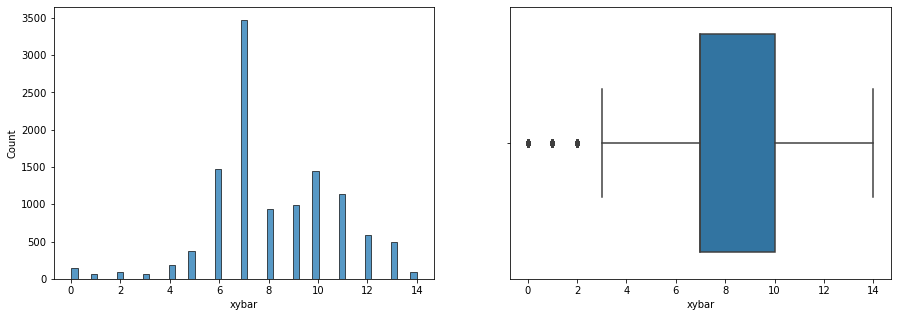

In [83]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='xybar', data=df1, ax=axs[0])
sns.boxplot(x='xybar', data=df1,ax=axs[1])

<AxesSubplot:xlabel='x2ybar'>

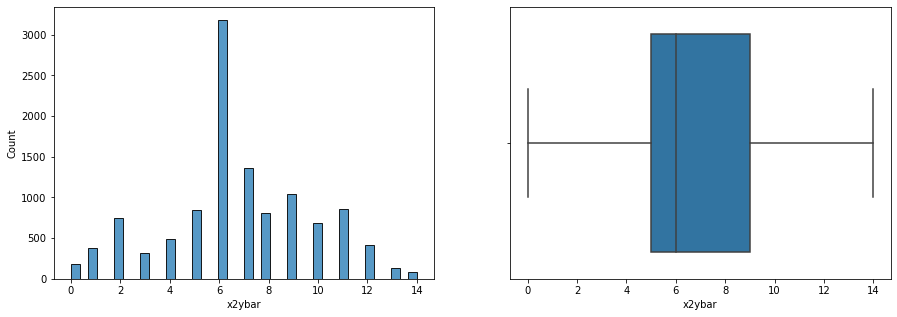

In [84]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='x2ybar', data=df1, ax=axs[0])
sns.boxplot(x='x2ybar', data=df1,ax=axs[1])

<AxesSubplot:xlabel='xy2bar'>

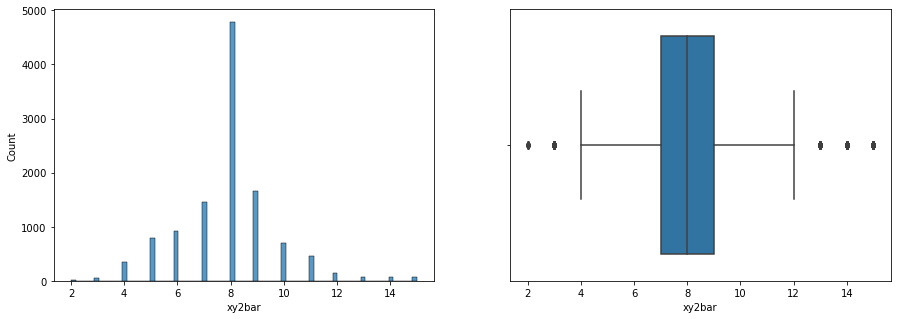

In [85]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='xy2bar', data=df1, ax=axs[0])
sns.boxplot(x='xy2bar', data=df1,ax=axs[1])

<AxesSubplot:xlabel='x_ege'>

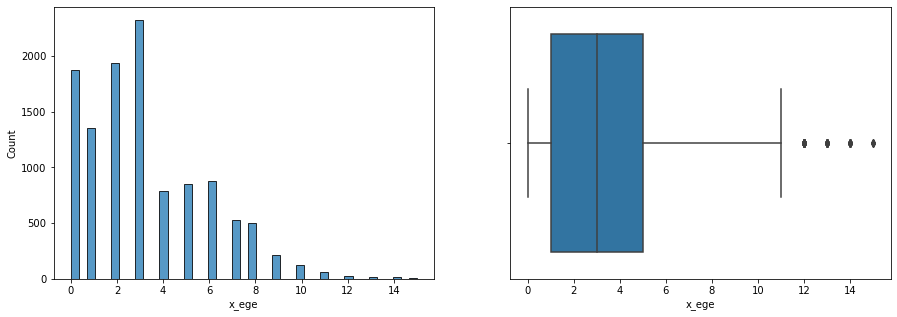

In [86]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='x_ege', data=df1, ax=axs[0])
sns.boxplot(x='x_ege', data=df1,ax=axs[1])

<AxesSubplot:xlabel='xegvy'>

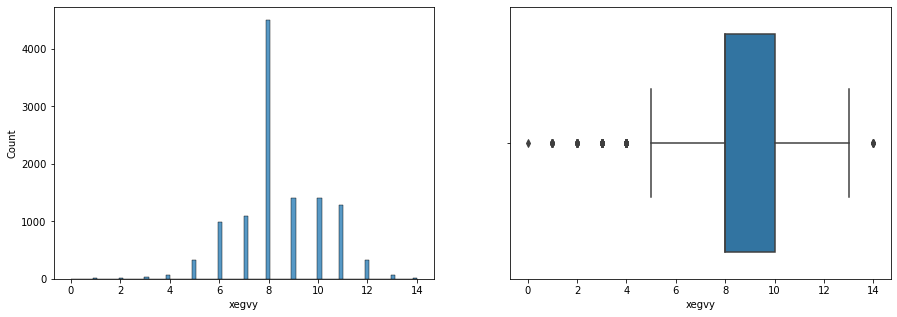

In [87]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='xegvy', data=df1, ax=axs[0])
sns.boxplot(x='xegvy', data=df1,ax=axs[1])

<AxesSubplot:xlabel='y_ege'>

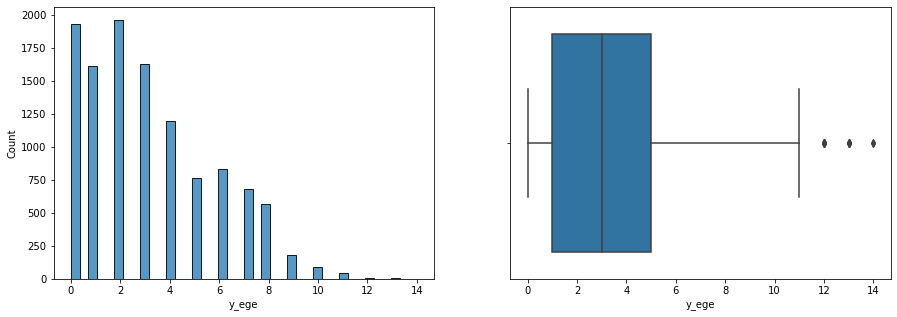

In [88]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='y_ege', data=df1, ax=axs[0])
sns.boxplot(x='y_ege', data=df1,ax=axs[1])

<AxesSubplot:xlabel='yegvx'>

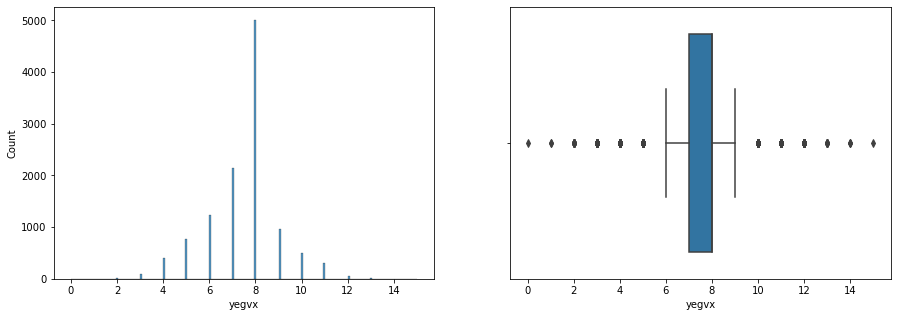

In [89]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='yegvx', data=df1, ax=axs[0])
sns.boxplot(x='yegvx', data=df1,ax=axs[1])

Observation:
Numeric fields - 'width','x_bar','y_bar','y2bar','xybar','x2ybar' and 'xegvy' show a symmetrical distribution. 'x_box','onpix','x2bar','x_ege' and 'y_ege' is right skew. 'y_box','high','xy2bar' and yegvx 'y_box' do not have any outliers. 'width','x_bar','y_bar','xybar','x2ybar','xy2bar','xegvy'and 'yegvx' both side of outliers. 'x_box','high','onpix','x2bar','y2bar','x_ege', and 'y_ege' have any outliers.

<AxesSubplot:xlabel='lettr', ylabel='count'>

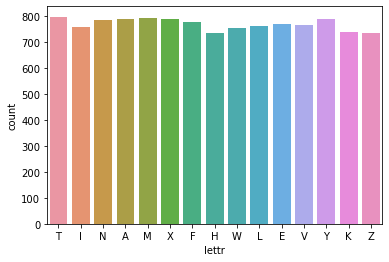

In [90]:
sns.countplot(x='lettr',data=df1)

Maximum is 800 value lettr of Y.

In [91]:
df1_num = df1.select_dtypes(exclude='object')
num_list1 = df1_num.columns
num_list1

Index(['x_box', 'y_box', 'width', 'high', 'onpix', 'x_bar', 'y_bar', 'x2bar',
       'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'x_ege', 'xegvy', 'y_ege',
       'yegvx'],
      dtype='object')

In [92]:
df1_cat = df1.select_dtypes(include='object')
cat_list1 = df1_cat.columns
cat_list1

Index(['lettr'], dtype='object')

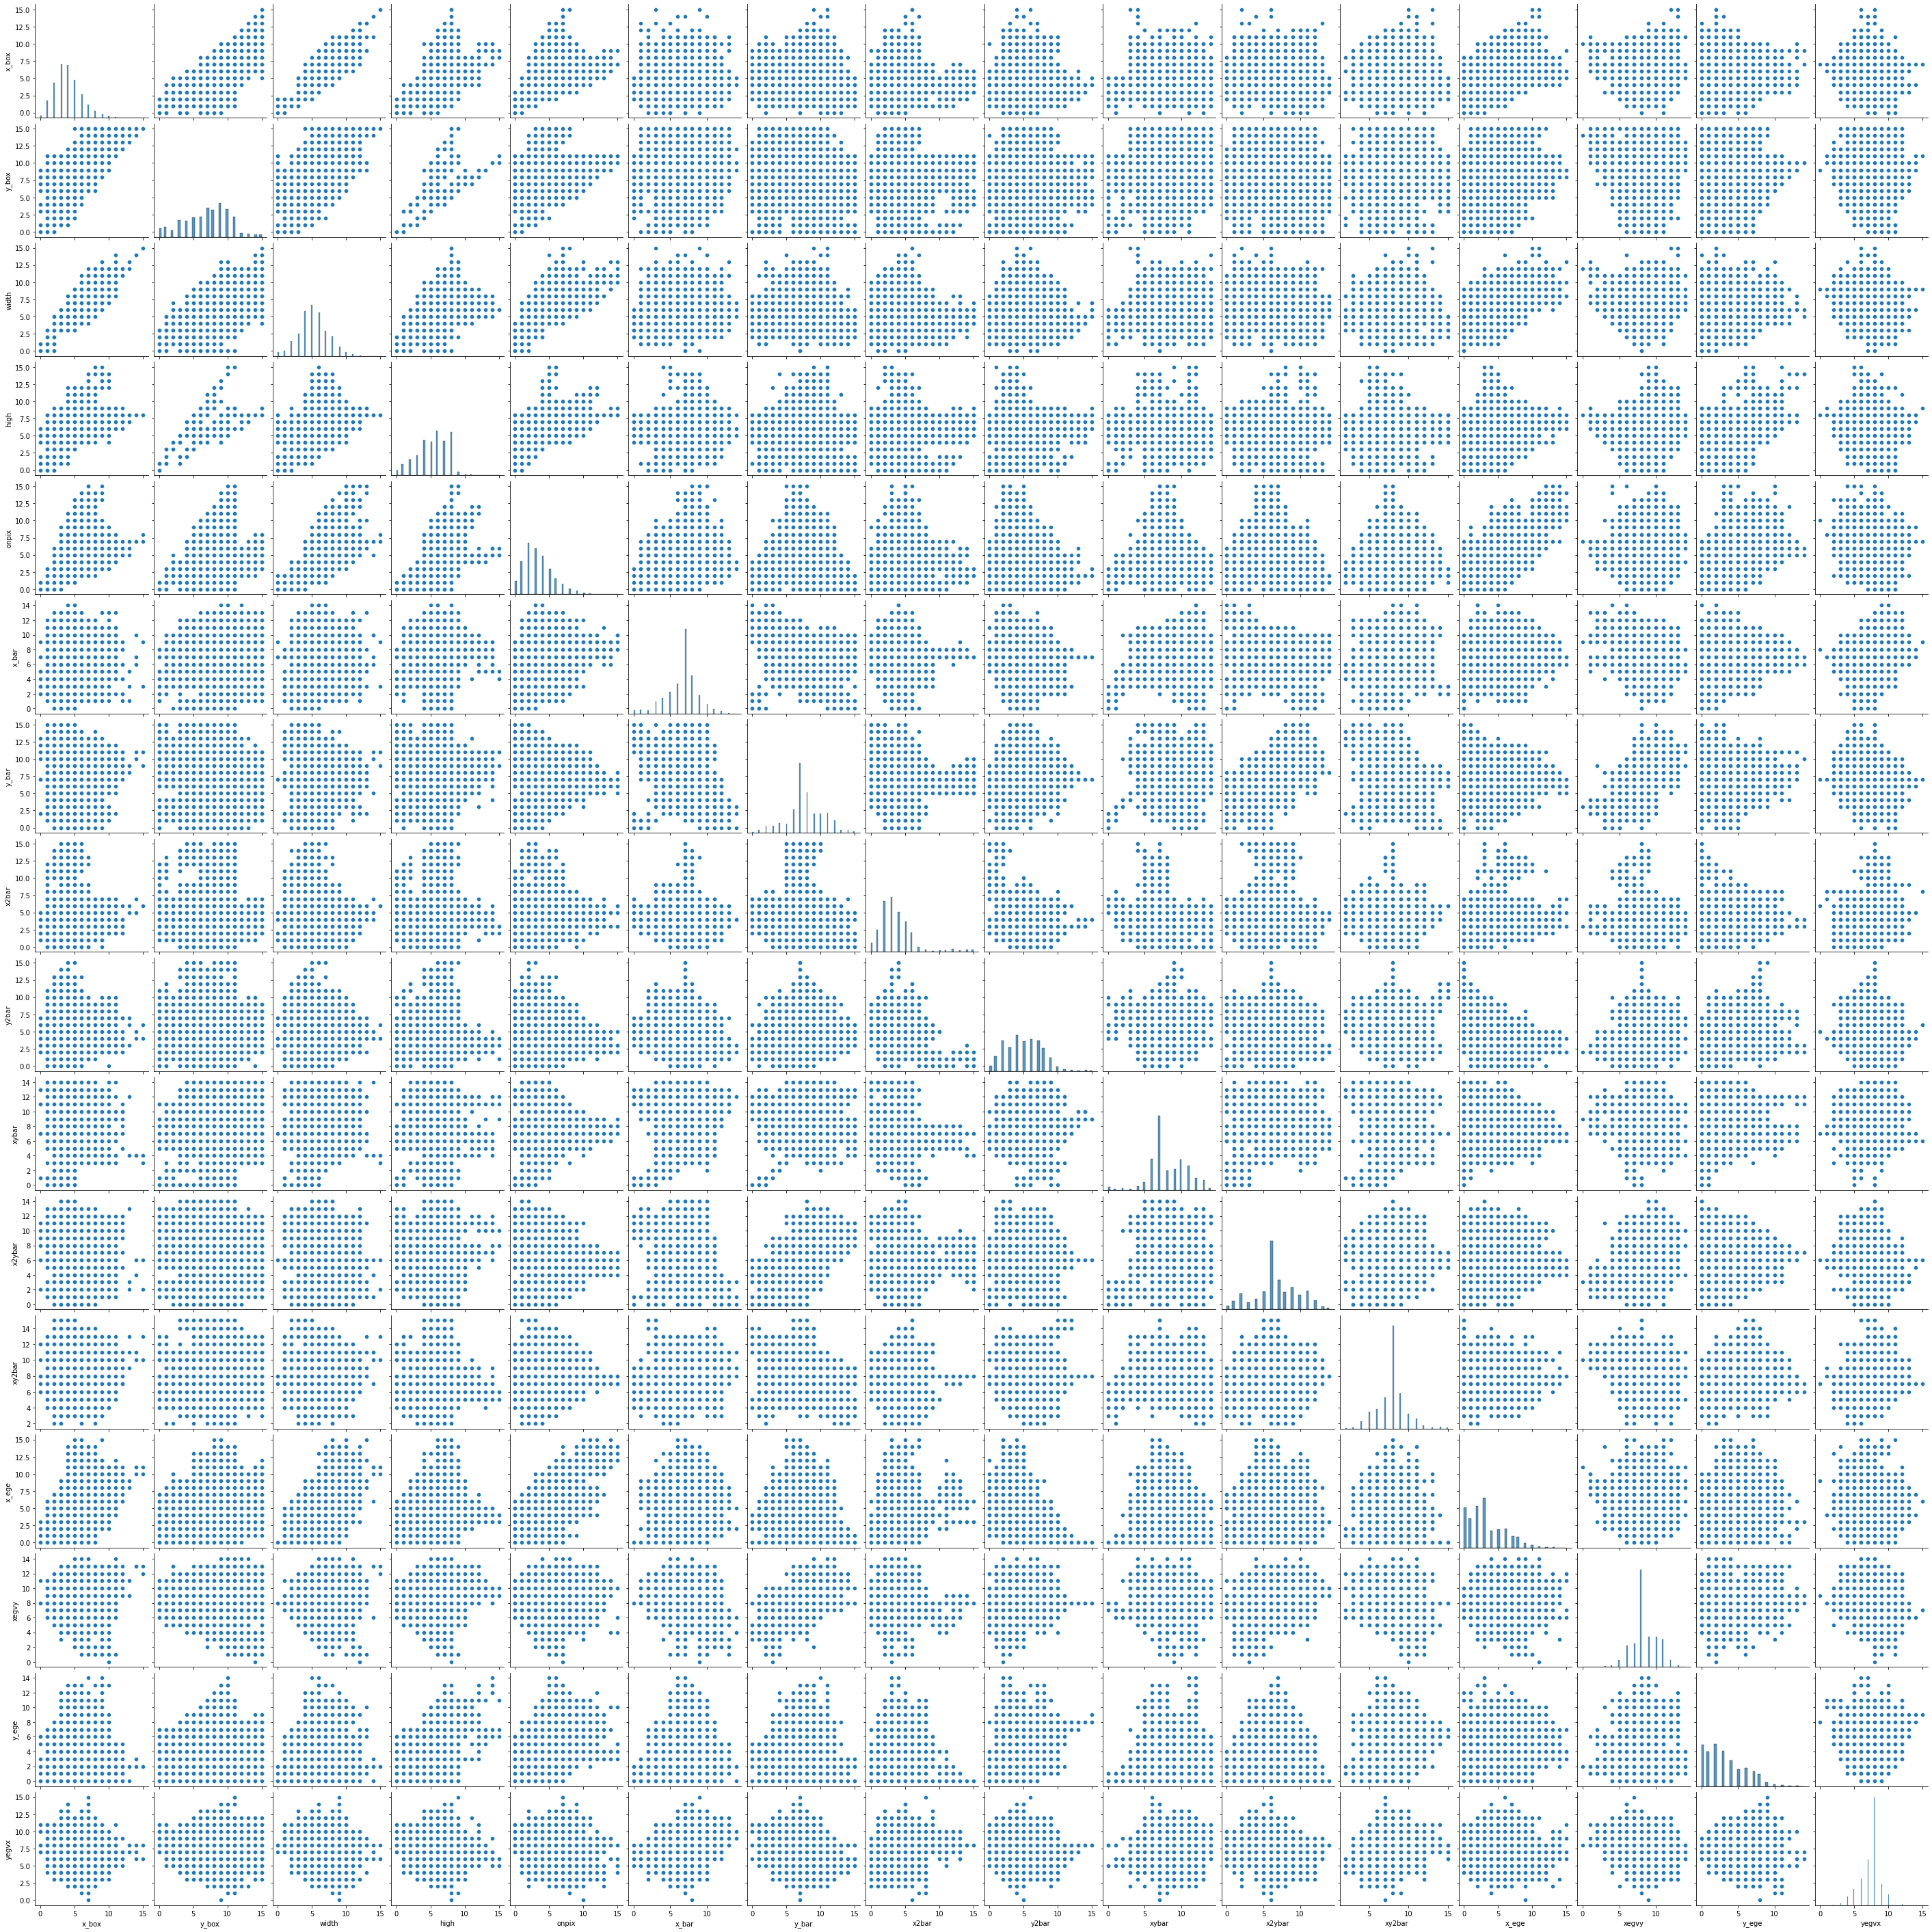

In [93]:
sns.pairplot(vars=num_list,data=df1)

Observation:
There is a specific pattern observed between 'x_box' and 'width'. As the 'y2bar' increases, 'x_ege' decreases. Also, it is observed that as the 'x_box' cost increases, 'width' also increases.

In [94]:
corr = df1.corr(method='pearson')
corr

x_box     y_box     width      high     onpix     x_bar     y_bar  \
x_box   1.000000  0.731164  0.858181  0.657310  0.635233 -0.002965  0.074376   
y_box   0.731164  1.000000  0.649566  0.834096  0.543865  0.054639 -0.023748   
width   0.858181  0.649566  1.000000  0.635208  0.771853  0.125894  0.019617   
high    0.657310  0.834096  0.635208  1.000000  0.621624  0.045966 -0.018158   
onpix   0.635233  0.543865  0.771853  0.621624  1.000000  0.181288 -0.057703   
x_bar  -0.002965  0.054639  0.125894  0.045966  0.181288  1.000000 -0.270117   
y_bar   0.074376 -0.023748  0.019617 -0.018158 -0.057703 -0.270117  1.000000   
x2bar   0.046973 -0.025895 -0.063973  0.062952  0.040739 -0.056123 -0.117323   
y2bar   0.029577  0.097084  0.033392  0.062325 -0.005908 -0.131624  0.001733   
xybar   0.190236  0.164551  0.169545  0.031656  0.006948  0.026164  0.280392   
x2ybar  0.062376 -0.029549  0.025775 -0.005544 -0.066093 -0.268336  0.751824   
xy2bar -0.044952  0.025218 -0.011811  0.024061  0.035429 -0.032086 -0.250082   
x_ege   0.489897  0.227936  0.565897  0.226417  0.620412  0.218967 -0.041005   
xegvy   0.131454  0.024182  0.047724  0.030471  0.001084 -0.212702  0.616736   
y_ege   0.261993  0.227096  0.272668  0.296955  0.495293  0.159100 -0.141161   
yegvx  -0.160061 -0.061642 -0.126931 -0.051092 -0.097817  0.247349 -0.267899   

           x2bar     y2bar     xybar    x2ybar    xy2bar     x_ege     xegvy  \
x_box   0.046973  0.029577  0.190236  0.062376 -0.044952  0.489897  0.131454   
y_box  -0.025895  0.097084  0.164551 -0.029549  0.025218  0.227936  0.024182   
width  -0.063973  0.033392  0.169545  0.025775 -0.011811  0.565897  0.047724   
high    0.062952  0.062325  0.031656 -0.005544  0.024061  0.226417  0.030471   
onpix   0.040739 -0.005908  0.006948 -0.066093  0.035429  0.620412  0.001084   
x_bar  -0.056123 -0.131624  0.026164 -0.268336 -0.032086  0.218967 -0.212702   
y_bar  -0.117323  0.001733  0.280392  0.751824 -0.250082 -0.041005  0.616736   
x2bar   1.000000 -0.337808 -0.350143 -0.042865  0.063199  0.288801 -0.139275   
y2bar  -0.337808  1.000000  0.193868 -0.086768  0.075900 -0.423043 -0.009197   
xybar  -0.350143  0.193868  1.000000  0.185007 -0.142983 -0.123670  0.064621   
x2ybar -0.042865 -0.086768  0.185007  1.000000 -0.049071  0.043831  0.564039   
xy2bar  0.063199  0.075900 -0.142983 -0.049071  1.000000  0.020274 -0.261733   
x_ege   0.288801 -0.423043 -0.123670  0.043831  0.020274  1.000000 -0.023226   
xegvy  -0.139275 -0.009197  0.064621  0.564039 -0.261733 -0.023226  1.000000   
y_ege  -0.074873  0.425472  0.074028 -0.200139  0.174624  0.048892 -0.075262   
yegvx   0.114957 -0.100954 -0.134993 -0.217534  0.385500 -0.020789 -0.236293   

           y_ege     yegvx  
x_box   0.261993 -0.160061  
y_box   0.227096 -0.061642  
width   0.272668 -0.126931  
high    0.296955 -0.051092  
onpix   0.495293 -0.097817  
x_bar   0.159100  0.247349  
y_bar  -0.141161 -0.267899  
x2bar  -0.074873  0.114957  
y2bar   0.425472 -0.100954  
xybar   0.074028 -0.134993  
x2ybar -0.200139 -0.217534  
xy2bar  0.174624  0.385500  
x_ege   0.048892 -0.020789  
xegvy  -0.075262 -0.236293  
y_ege   1.000000  0.032319  
yegvx   0.032319  1.000000

<AxesSubplot:>

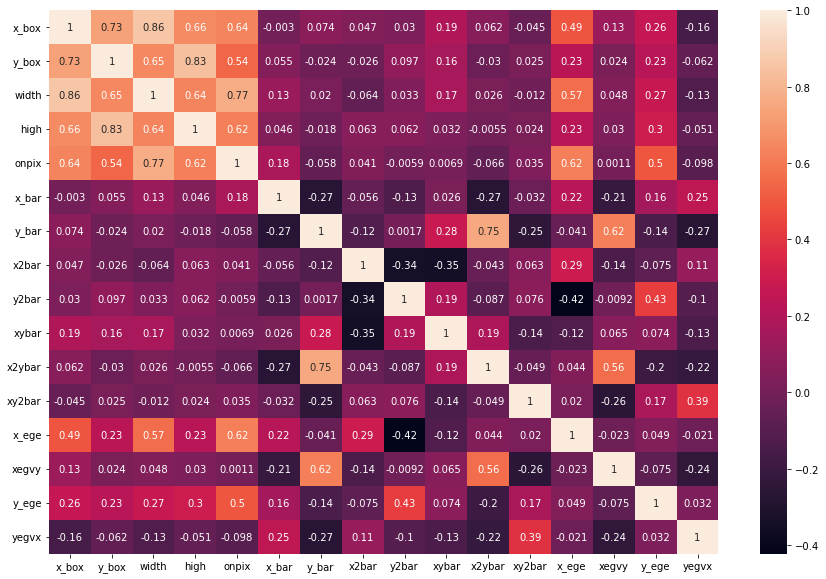

In [95]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr,data=df1, annot=True)

Observation
Correlation matrix gives us a similar representation as the pairplot.
We observe a positive correlation between 'x_box' and 'width' and a negative correlation between 'y2bar' and 'x_ege'.
Additionally, there is a strong negative correlation between 'x2bar' and 'xybar' thus showing multi-collinearity between the independent variables.

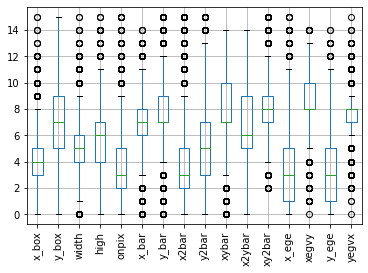

In [96]:
df1[num_list1].boxplot()
plt.xticks(rotation=90)
plt.show()

In [97]:
x1=df1.drop('lettr',axis=1)
y1=df1.lettr

In [98]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1,y1,test_size=0.3, random_state=123)

In [99]:
X1_train.shape

(8060, 16)

In [100]:
X1_test.shape

(3455, 16)

In [101]:
X1_test.describe()

x_box        y_box        width         high        onpix  \
count  3455.000000  3455.000000  3455.000000  3455.000000  3455.000000   
mean      3.984660     7.045441     5.168452     5.306223     3.391027   
std       1.978766     3.330817     2.182334     2.250910     2.238573   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     5.000000     4.000000     4.000000     2.000000   
50%       4.000000     7.000000     5.000000     6.000000     3.000000   
75%       5.000000     9.000000     6.000000     7.000000     5.000000   
max      15.000000    15.000000    15.000000    15.000000    15.000000   

             x_bar        y_bar        x2bar        y2bar        xybar  \
count  3455.000000  3455.000000  3455.000000  3455.000000  3455.000000   
mean      6.636469     7.635311     3.809551     5.103907     8.147033   
std       2.189185     2.661271     2.768562     2.684732     2.569098   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000     7.000000     2.000000     3.000000     7.000000   
50%       7.000000     7.000000     3.000000     5.000000     7.000000   
75%       8.000000     9.000000     5.000000     7.000000    10.000000   
max      14.000000    15.000000    15.000000    15.000000    14.000000   

            x2ybar       xy2bar        x_ege        xegvy        y_ege  \
count  3455.000000  3455.000000  3455.000000  3455.000000  3455.000000   
mean      6.671491     7.956585     3.173082     8.405210     3.138640   
std       2.962814     1.800364     2.629203     1.707362     2.568043   
min       0.000000     2.000000     0.000000     1.000000     0.000000   
25%       5.000000     7.000000     1.000000     8.000000     1.000000   
50%       6.000000     8.000000     3.000000     8.000000     3.000000   
75%       9.000000     9.000000     5.000000    10.000000     5.000000   
max      14.000000    15.000000    14.000000    14.000000    13.000000   

             yegvx  
count  3455.000000  
mean      7.506512  
std       1.562962  
min       0.000000  
25%       7.000000  
50%       8.000000  
75%       8.000000  
max      13.000000

In [102]:
sclr=StandardScaler()

In [103]:
X1_train[num_list1]=sclr.fit_transform(X1_train[num_list1])

In [104]:
X1_test[num_list1]=sclr.transform(X1_test[num_list1])

In [105]:
KNN1_model2=KNeighborsClassifier()
KNN1_model2.fit(X1_train,Y1_train)

KNeighborsClassifier()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


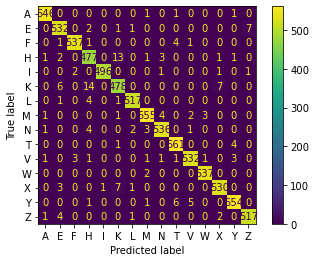

In [106]:
Y1_train_pred=KNN1_model2.predict(X1_train)
plot_confusion_matrix(KNN1_model2,X1_train,Y1_train)

In [107]:
print(classification_report(Y1_train,Y1_train_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       549
           E       0.97      0.98      0.97       543
           F       0.99      0.99      0.99       544
           H       0.95      0.96      0.95       499
           I       1.00      0.99      0.99       501
           K       0.95      0.95      0.95       505
           L       0.99      0.99      0.99       523
           M       0.98      0.98      0.98       566
           N       0.98      0.98      0.98       547
           T       0.98      0.99      0.99       566
           V       0.98      0.98      0.98       544
           W       0.99      1.00      0.99       539
           X       0.98      0.98      0.98       542
           Y       0.98      0.98      0.98       567
           Z       0.98      0.98      0.98       525

    accuracy                           0.98      8060
   macro avg       0.98      0.98      0.98      8060
weighted avg       0.98   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


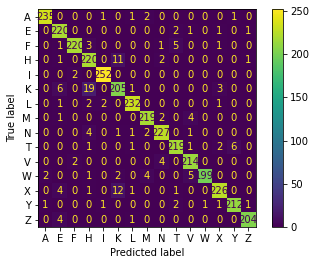

In [108]:
Y1_test_pred = KNN1_model2.predict(X1_test)
plot_confusion_matrix(KNN1_model2,X1_test,Y1_test)

In [109]:
print(classification_report(Y1_test,Y1_test_pred))

              precision    recall  f1-score   support

           A       0.99      0.98      0.98       240
           E       0.92      0.98      0.95       225
           F       0.98      0.95      0.97       231
           H       0.88      0.94      0.91       235
           I       0.98      0.99      0.99       254
           K       0.89      0.88      0.88       234
           L       0.97      0.97      0.97       238
           M       0.96      0.97      0.97       226
           N       0.96      0.96      0.96       236
           T       0.96      0.95      0.95       230
           V       0.95      0.97      0.96       220
           W       0.99      0.93      0.96       213
           X       0.96      0.92      0.94       245
           Y       0.97      0.97      0.97       219
           Z       0.99      0.98      0.98       209

    accuracy                           0.96      3455
   macro avg       0.96      0.96      0.96      3455
weighted avg       0.96   

In [110]:
ac_scores=[]

for k in range(2,30,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X1_train,Y1_train)
    scores = knn.score(X1_test,Y1_test)
    ac_scores.append(scores)

MCE = [1- x for x in ac_scores]
MCE

[0.053256150506512334,
 0.043994211287988416,
 0.04659913169319829,
 0.047467438494934844,
 0.051808972503617934,
 0.054124457308248886,
 0.05528219971056436,
 0.060492040520984114,
 0.061360347322720665,
 0.06714905933429816,
 0.06946454413892911,
 0.0709117221418234,
 0.07496382054992767,
 0.07959479015918958]

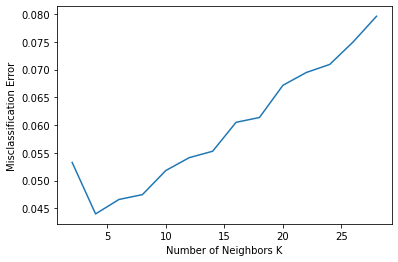

In [111]:
plt.plot(range(2,30,2),MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [112]:
KNN1_model3 = KNeighborsClassifier(n_neighbors=4)
KNN1_model3.fit(X1_train,Y1_train)

KNeighborsClassifier(n_neighbors=4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


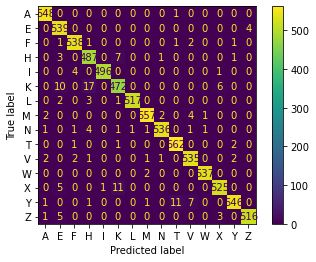

In [113]:
Y1_train_pred=KNN1_model3.predict(X1_train)
plot_confusion_matrix(KNN1_model3,X1_train,Y1_train)

In [114]:
print(classification_report(Y1_train,Y1_train_pred))

              precision    recall  f1-score   support

           A       0.99      1.00      0.99       549
           E       0.95      0.99      0.97       543
           F       0.99      0.99      0.99       544
           H       0.95      0.98      0.96       499
           I       1.00      0.99      0.99       501
           K       0.96      0.93      0.95       505
           L       1.00      0.99      0.99       523
           M       0.99      0.98      0.99       566
           N       0.99      0.98      0.99       547
           T       0.98      0.99      0.99       566
           V       0.97      0.98      0.98       544
           W       1.00      1.00      1.00       539
           X       0.98      0.97      0.97       542
           Y       0.99      0.96      0.98       567
           Z       0.99      0.98      0.99       525

    accuracy                           0.98      8060
   macro avg       0.98      0.98      0.98      8060
weighted avg       0.98   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


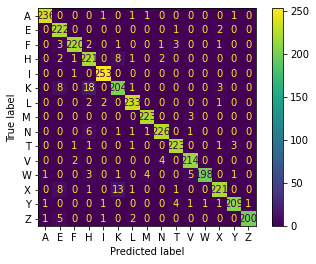

In [115]:
Y1_test_pred = KNN1_model3.predict(X1_test)
plot_confusion_matrix(KNN1_model3,X1_test,Y1_test)

In [116]:
print(classification_report(Y1_test,Y1_test_pred))

              precision    recall  f1-score   support

           A       0.99      0.98      0.99       240
           E       0.90      0.99      0.94       225
           F       0.98      0.95      0.96       231
           H       0.87      0.94      0.90       235
           I       0.98      1.00      0.99       254
           K       0.89      0.87      0.88       234
           L       0.97      0.98      0.97       238
           M       0.97      0.99      0.98       226
           N       0.97      0.96      0.96       236
           T       0.96      0.97      0.97       230
           V       0.96      0.97      0.96       220
           W       0.99      0.93      0.96       213
           X       0.96      0.90      0.93       245
           Y       0.98      0.95      0.97       219
           Z       1.00      0.96      0.98       209

    accuracy                           0.96      3455
   macro avg       0.96      0.96      0.96      3455
weighted avg       0.96   

Conclusion:-
Overall accuracy of the built KNN regression model is at 96% on the test dataset.
Accuracy in train dataset is at 98% and test dataset is at 96%. As there is not much difference, there is no overfitting in the model.
Considering the evaluation, we can consider the above model as the final one.

In [117]:
svc2=SVC()

In [118]:
svc2.fit(X_train,Y_train)

SVC()

In [119]:
Y1_pred_train=svc2.predict(X1_train)
Y1_pred_test = svc2.predict(X1_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


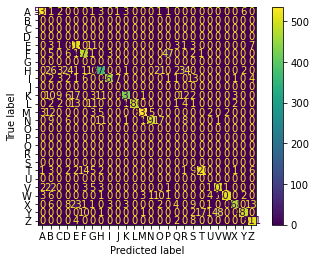

In [120]:
plot_confusion_matrix(svc2,X1_train,Y1_train)

In [121]:
print(classification_report(Y1_train,Y1_train_pred))

              precision    recall  f1-score   support

           A       0.99      1.00      0.99       549
           E       0.95      0.99      0.97       543
           F       0.99      0.99      0.99       544
           H       0.95      0.98      0.96       499
           I       1.00      0.99      0.99       501
           K       0.96      0.93      0.95       505
           L       1.00      0.99      0.99       523
           M       0.99      0.98      0.99       566
           N       0.99      0.98      0.99       547
           T       0.98      0.99      0.99       566
           V       0.97      0.98      0.98       544
           W       1.00      1.00      1.00       539
           X       0.98      0.97      0.97       542
           Y       0.99      0.96      0.98       567
           Z       0.99      0.98      0.99       525

    accuracy                           0.98      8060
   macro avg       0.98      0.98      0.98      8060
weighted avg       0.98   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


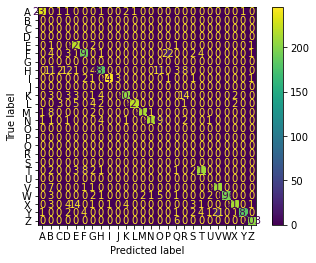

In [122]:
plot_confusion_matrix(svc2,X1_test,Y1_test)

In [123]:
print(classification_report(Y1_test,Y1_test_pred))

              precision    recall  f1-score   support

           A       0.99      0.98      0.99       240
           E       0.90      0.99      0.94       225
           F       0.98      0.95      0.96       231
           H       0.87      0.94      0.90       235
           I       0.98      1.00      0.99       254
           K       0.89      0.87      0.88       234
           L       0.97      0.98      0.97       238
           M       0.97      0.99      0.98       226
           N       0.97      0.96      0.96       236
           T       0.96      0.97      0.97       230
           V       0.96      0.97      0.96       220
           W       0.99      0.93      0.96       213
           X       0.96      0.90      0.93       245
           Y       0.98      0.95      0.97       219
           Z       1.00      0.96      0.98       209

    accuracy                           0.96      3455
   macro avg       0.96      0.96      0.96      3455
weighted avg       0.96   

In [124]:
param_grid = {'kernel':['linear','rbf','poly'],'C':[0.001,0.1,1,10,100],'gamma':[0.0001,0.01,0.1,1,10]}
svc3 =  SVC(random_state=123)
grid_search = GridSearchCV(estimator=svc3,param_grid=param_grid,cv=10)

In [125]:
grid_search.fit(X1_train,Y1_train)

GridSearchCV(cv=10, estimator=SVC(random_state=123),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [126]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [127]:
svc3=grid_search.best_estimator_

In [128]:
y1_pred_train=svc3.predict(X1_train)
y1_pred_test=svc3.predict(X1_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


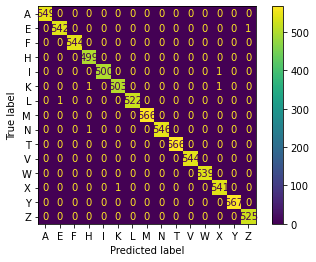

In [129]:
plot_confusion_matrix(svc3,X1_train,Y1_train)

In [130]:
print(classification_report(Y1_train,Y1_train_pred))

              precision    recall  f1-score   support

           A       0.99      1.00      0.99       549
           E       0.95      0.99      0.97       543
           F       0.99      0.99      0.99       544
           H       0.95      0.98      0.96       499
           I       1.00      0.99      0.99       501
           K       0.96      0.93      0.95       505
           L       1.00      0.99      0.99       523
           M       0.99      0.98      0.99       566
           N       0.99      0.98      0.99       547
           T       0.98      0.99      0.99       566
           V       0.97      0.98      0.98       544
           W       1.00      1.00      1.00       539
           X       0.98      0.97      0.97       542
           Y       0.99      0.96      0.98       567
           Z       0.99      0.98      0.99       525

    accuracy                           0.98      8060
   macro avg       0.98      0.98      0.98      8060
weighted avg       0.98   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


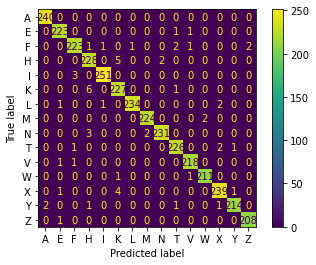

In [131]:
plot_confusion_matrix(svc3,X1_test,Y1_test)

In [132]:
print(classification_report(Y1_test,Y1_test_pred))

              precision    recall  f1-score   support

           A       0.99      0.98      0.99       240
           E       0.90      0.99      0.94       225
           F       0.98      0.95      0.96       231
           H       0.87      0.94      0.90       235
           I       0.98      1.00      0.99       254
           K       0.89      0.87      0.88       234
           L       0.97      0.98      0.97       238
           M       0.97      0.99      0.98       226
           N       0.97      0.96      0.96       236
           T       0.96      0.97      0.97       230
           V       0.96      0.97      0.96       220
           W       0.99      0.93      0.96       213
           X       0.96      0.90      0.93       245
           Y       0.98      0.95      0.97       219
           Z       1.00      0.96      0.98       209

    accuracy                           0.96      3455
   macro avg       0.96      0.96      0.96      3455
weighted avg       0.96   

Conclusion:-
Overall accuracy of the built SVM regression model is at 96% on the test dataset.
Accuracy in train dataset is at 98% and test dataset is at 96%. As there is not much difference, there is no overfitting in the model.
Considering the evaluation, we can consider the above model as the final one.

curves

In [133]:
df2=df[(df['lettr']=='B')|(df['lettr']=='C')|(df['lettr']=='D')|(df['lettr']=='G')|(df['lettr']=='J')|(df['lettr']=='O')|(df['lettr']=='P')|(df['lettr']=='Q')|(df['lettr']=='R')|(df['lettr']=='S')|(df['lettr']=='U')]

<AxesSubplot:xlabel='x_box'>

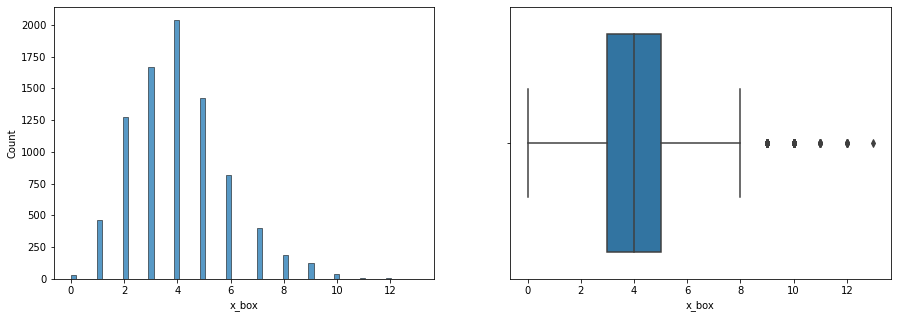

In [134]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='x_box', data=df2, ax=axs[0])
sns.boxplot(x='x_box', data=df2,ax=axs[1])

<AxesSubplot:xlabel='y_box'>

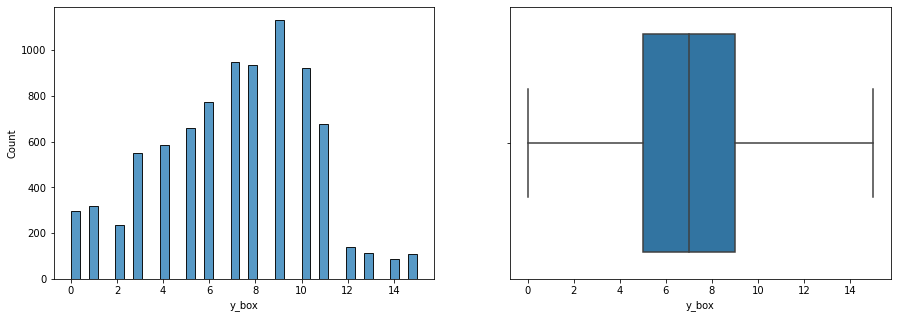

In [135]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='y_box', data=df2, ax=axs[0])
sns.boxplot(x='y_box', data=df2,ax=axs[1])

<AxesSubplot:xlabel='width'>

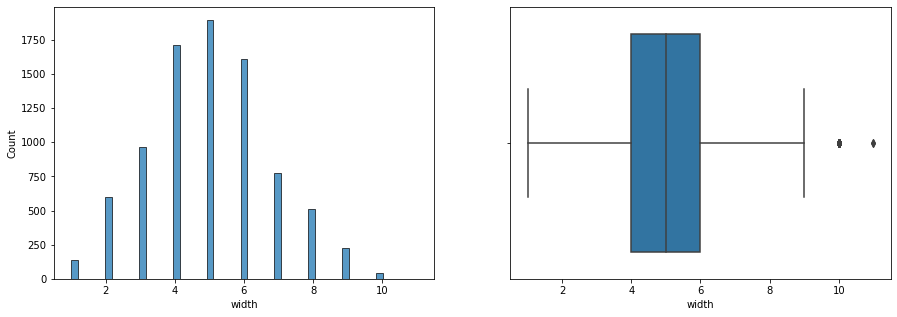

In [136]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='width', data=df2, ax=axs[0])
sns.boxplot(x='width', data=df2,ax=axs[1])

<AxesSubplot:xlabel='high'>

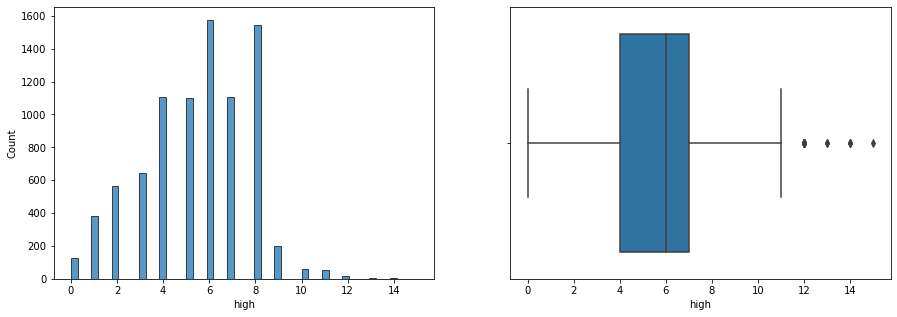

In [137]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='high', data=df2, ax=axs[0])
sns.boxplot(x='high', data=df2,ax=axs[1])

<AxesSubplot:xlabel='onpix'>

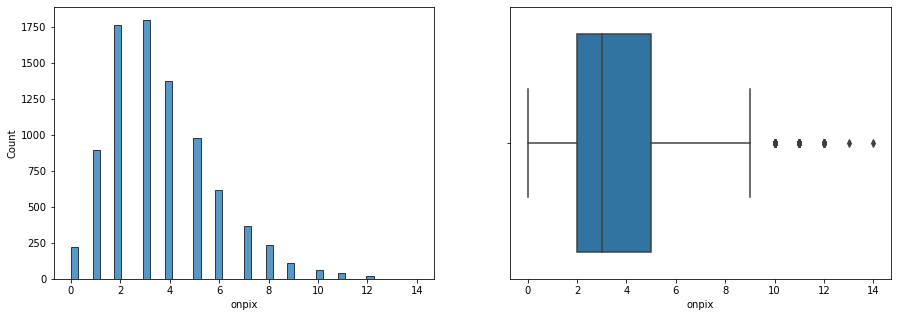

In [138]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='onpix', data=df2, ax=axs[0])
sns.boxplot(x='onpix', data=df2,ax=axs[1])

<AxesSubplot:xlabel='x_bar'>

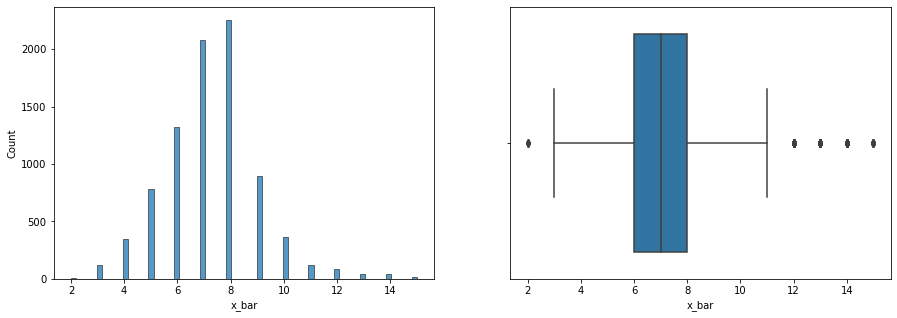

In [139]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='x_bar', data=df2, ax=axs[0])
sns.boxplot(x='x_bar', data=df2,ax=axs[1])

<AxesSubplot:xlabel='y_bar'>

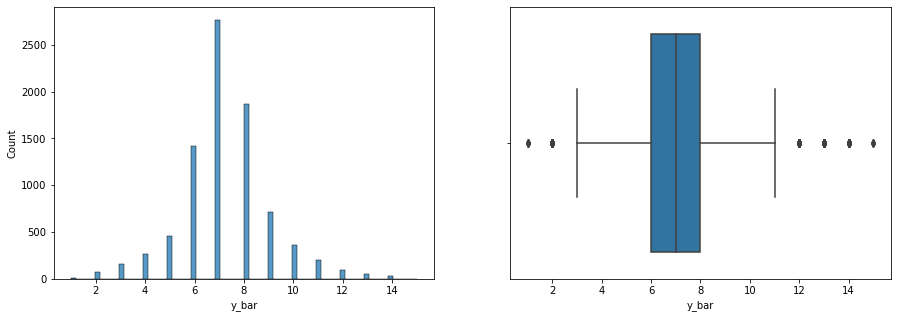

In [140]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='y_bar', data=df2, ax=axs[0])
sns.boxplot(x='y_bar', data=df2,ax=axs[1])

<AxesSubplot:xlabel='x2bar'>

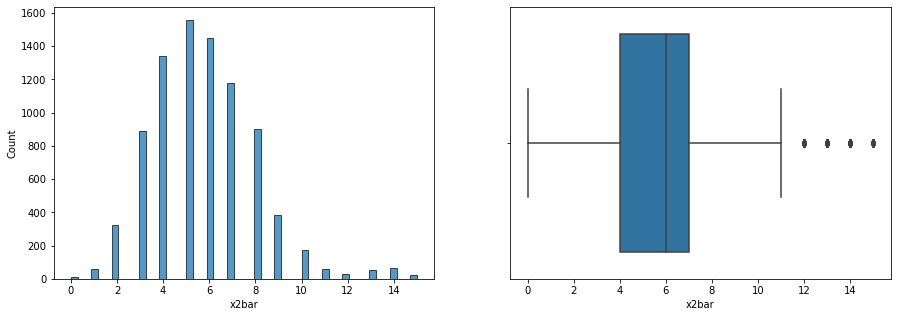

In [141]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='x2bar', data=df2, ax=axs[0])
sns.boxplot(x='x2bar', data=df2,ax=axs[1])

<AxesSubplot:xlabel='y2bar'>

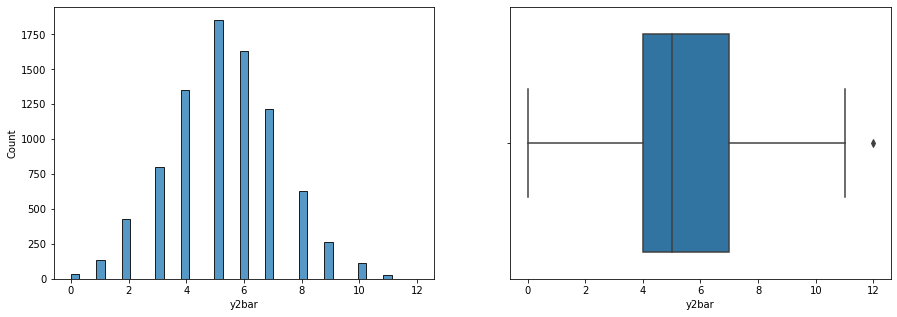

In [142]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='y2bar', data=df2, ax=axs[0])
sns.boxplot(x='y2bar', data=df2,ax=axs[1])

<AxesSubplot:xlabel='xybar'>

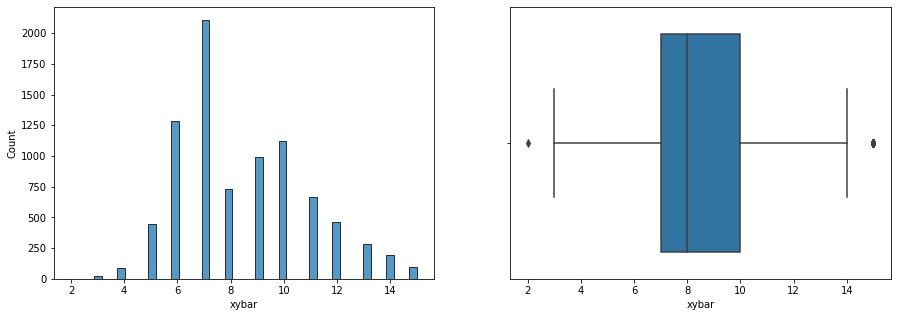

In [143]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='xybar', data=df2, ax=axs[0])
sns.boxplot(x='xybar', data=df2,ax=axs[1])

<AxesSubplot:xlabel='x2ybar'>

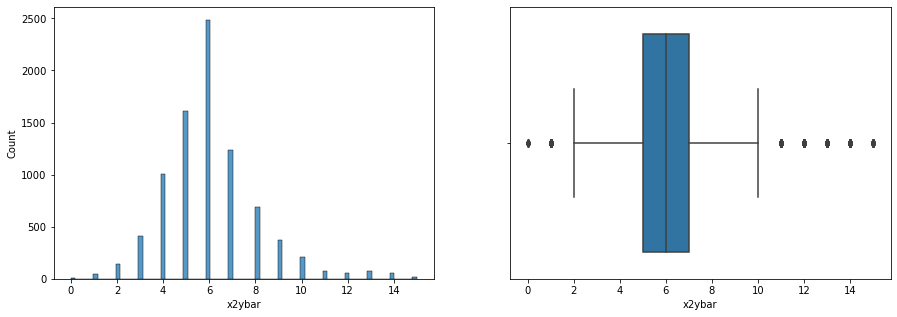

In [144]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='x2ybar', data=df2, ax=axs[0])
sns.boxplot(x='x2ybar', data=df2,ax=axs[1])

<AxesSubplot:xlabel='xy2bar'>

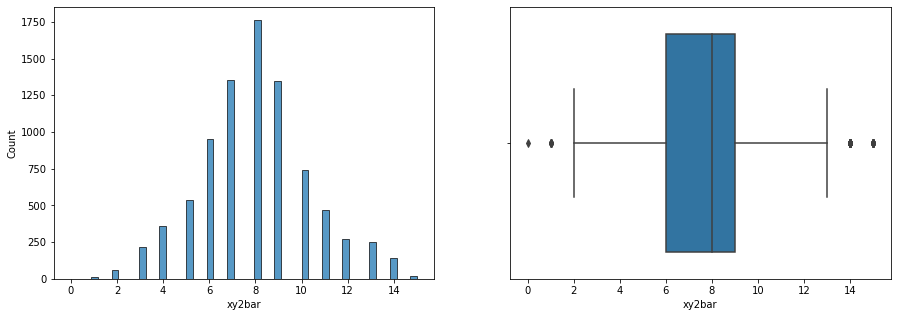

In [145]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='xy2bar', data=df2, ax=axs[0])
sns.boxplot(x='xy2bar', data=df2,ax=axs[1])

<AxesSubplot:xlabel='x_ege'>

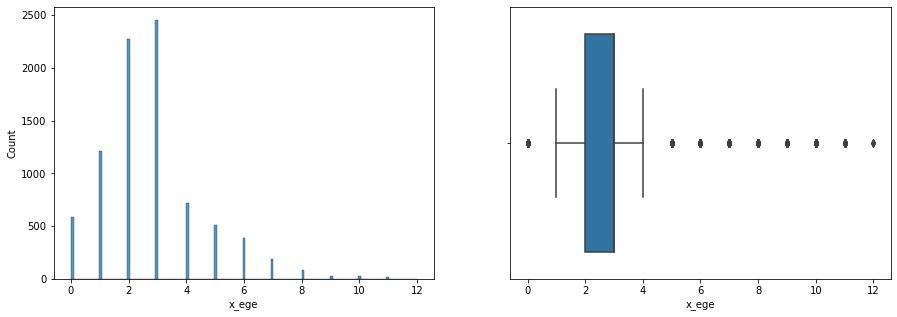

In [146]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='x_ege', data=df2, ax=axs[0])
sns.boxplot(x='x_ege', data=df2,ax=axs[1])

<AxesSubplot:xlabel='xegvy'>

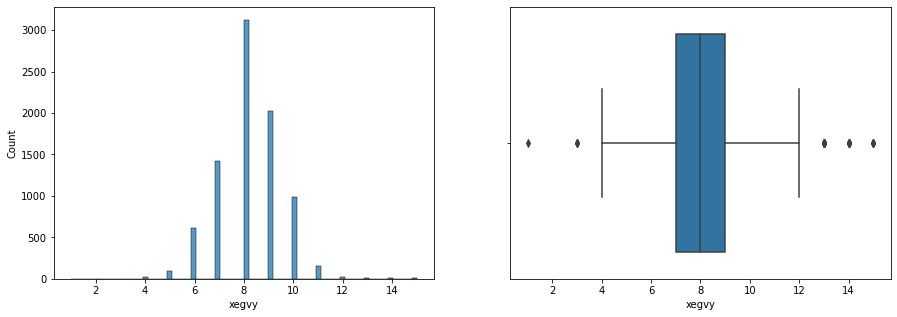

In [147]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='xegvy', data=df2, ax=axs[0])
sns.boxplot(x='xegvy', data=df2,ax=axs[1])

<AxesSubplot:xlabel='y_ege'>

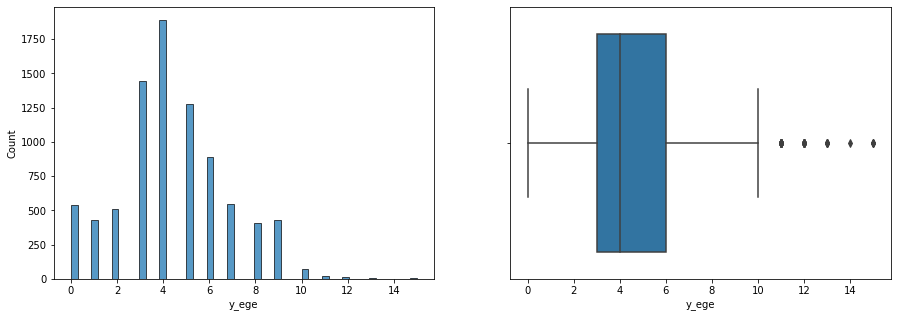

In [148]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='y_ege', data=df2, ax=axs[0])
sns.boxplot(x='y_ege', data=df2,ax=axs[1])

<AxesSubplot:xlabel='yegvx'>

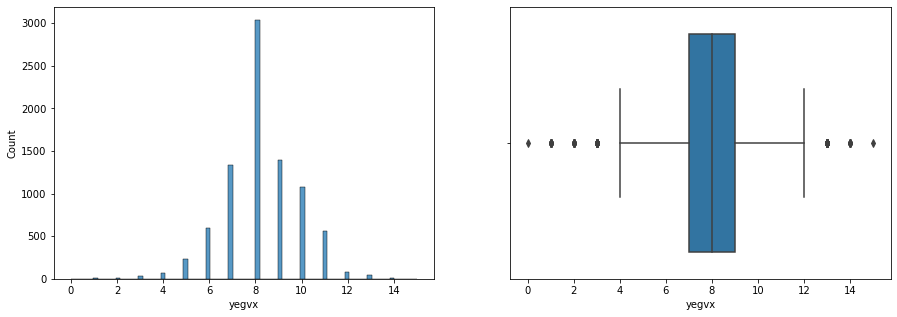

In [149]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='yegvx', data=df2, ax=axs[0])
sns.boxplot(x='yegvx', data=df2,ax=axs[1])

Observation:
Numeric fields - 'width','x_bar','y_bar','y2bar','xybar','x2ybar' and 'xegvy' show a symmetrical distribution. 'x_box','onpix','x2bar','x_ege' and 'y_ege' is right skew. 'y_box','high','xy2bar' and yegvx 'y_box' do not have any outliers. 'width','x_bar','y_bar','xybar','x2ybar','xy2bar','xegvy'and 'yegvx' both side of outliers. 'x_box','high','onpix','x2bar','y2bar','x_ege', and 'y_ege' have any outliers.

<AxesSubplot:xlabel='lettr', ylabel='count'>

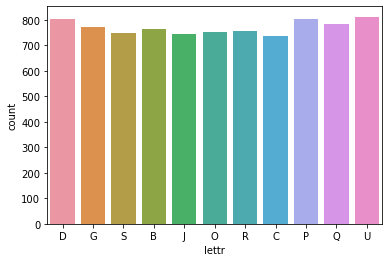

In [150]:
sns.countplot(x='lettr',data=df2)

Maximum is 820 value lettr of U.

In [151]:
df2_num = df2.select_dtypes(exclude='object')
num_list2 = df2_num.columns
num_list2

Index(['x_box', 'y_box', 'width', 'high', 'onpix', 'x_bar', 'y_bar', 'x2bar',
       'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'x_ege', 'xegvy', 'y_ege',
       'yegvx'],
      dtype='object')

In [152]:
df2_cat = df2.select_dtypes(include='object')
cat_list2 = df2_cat.columns
cat_list2

Index(['lettr'], dtype='object')

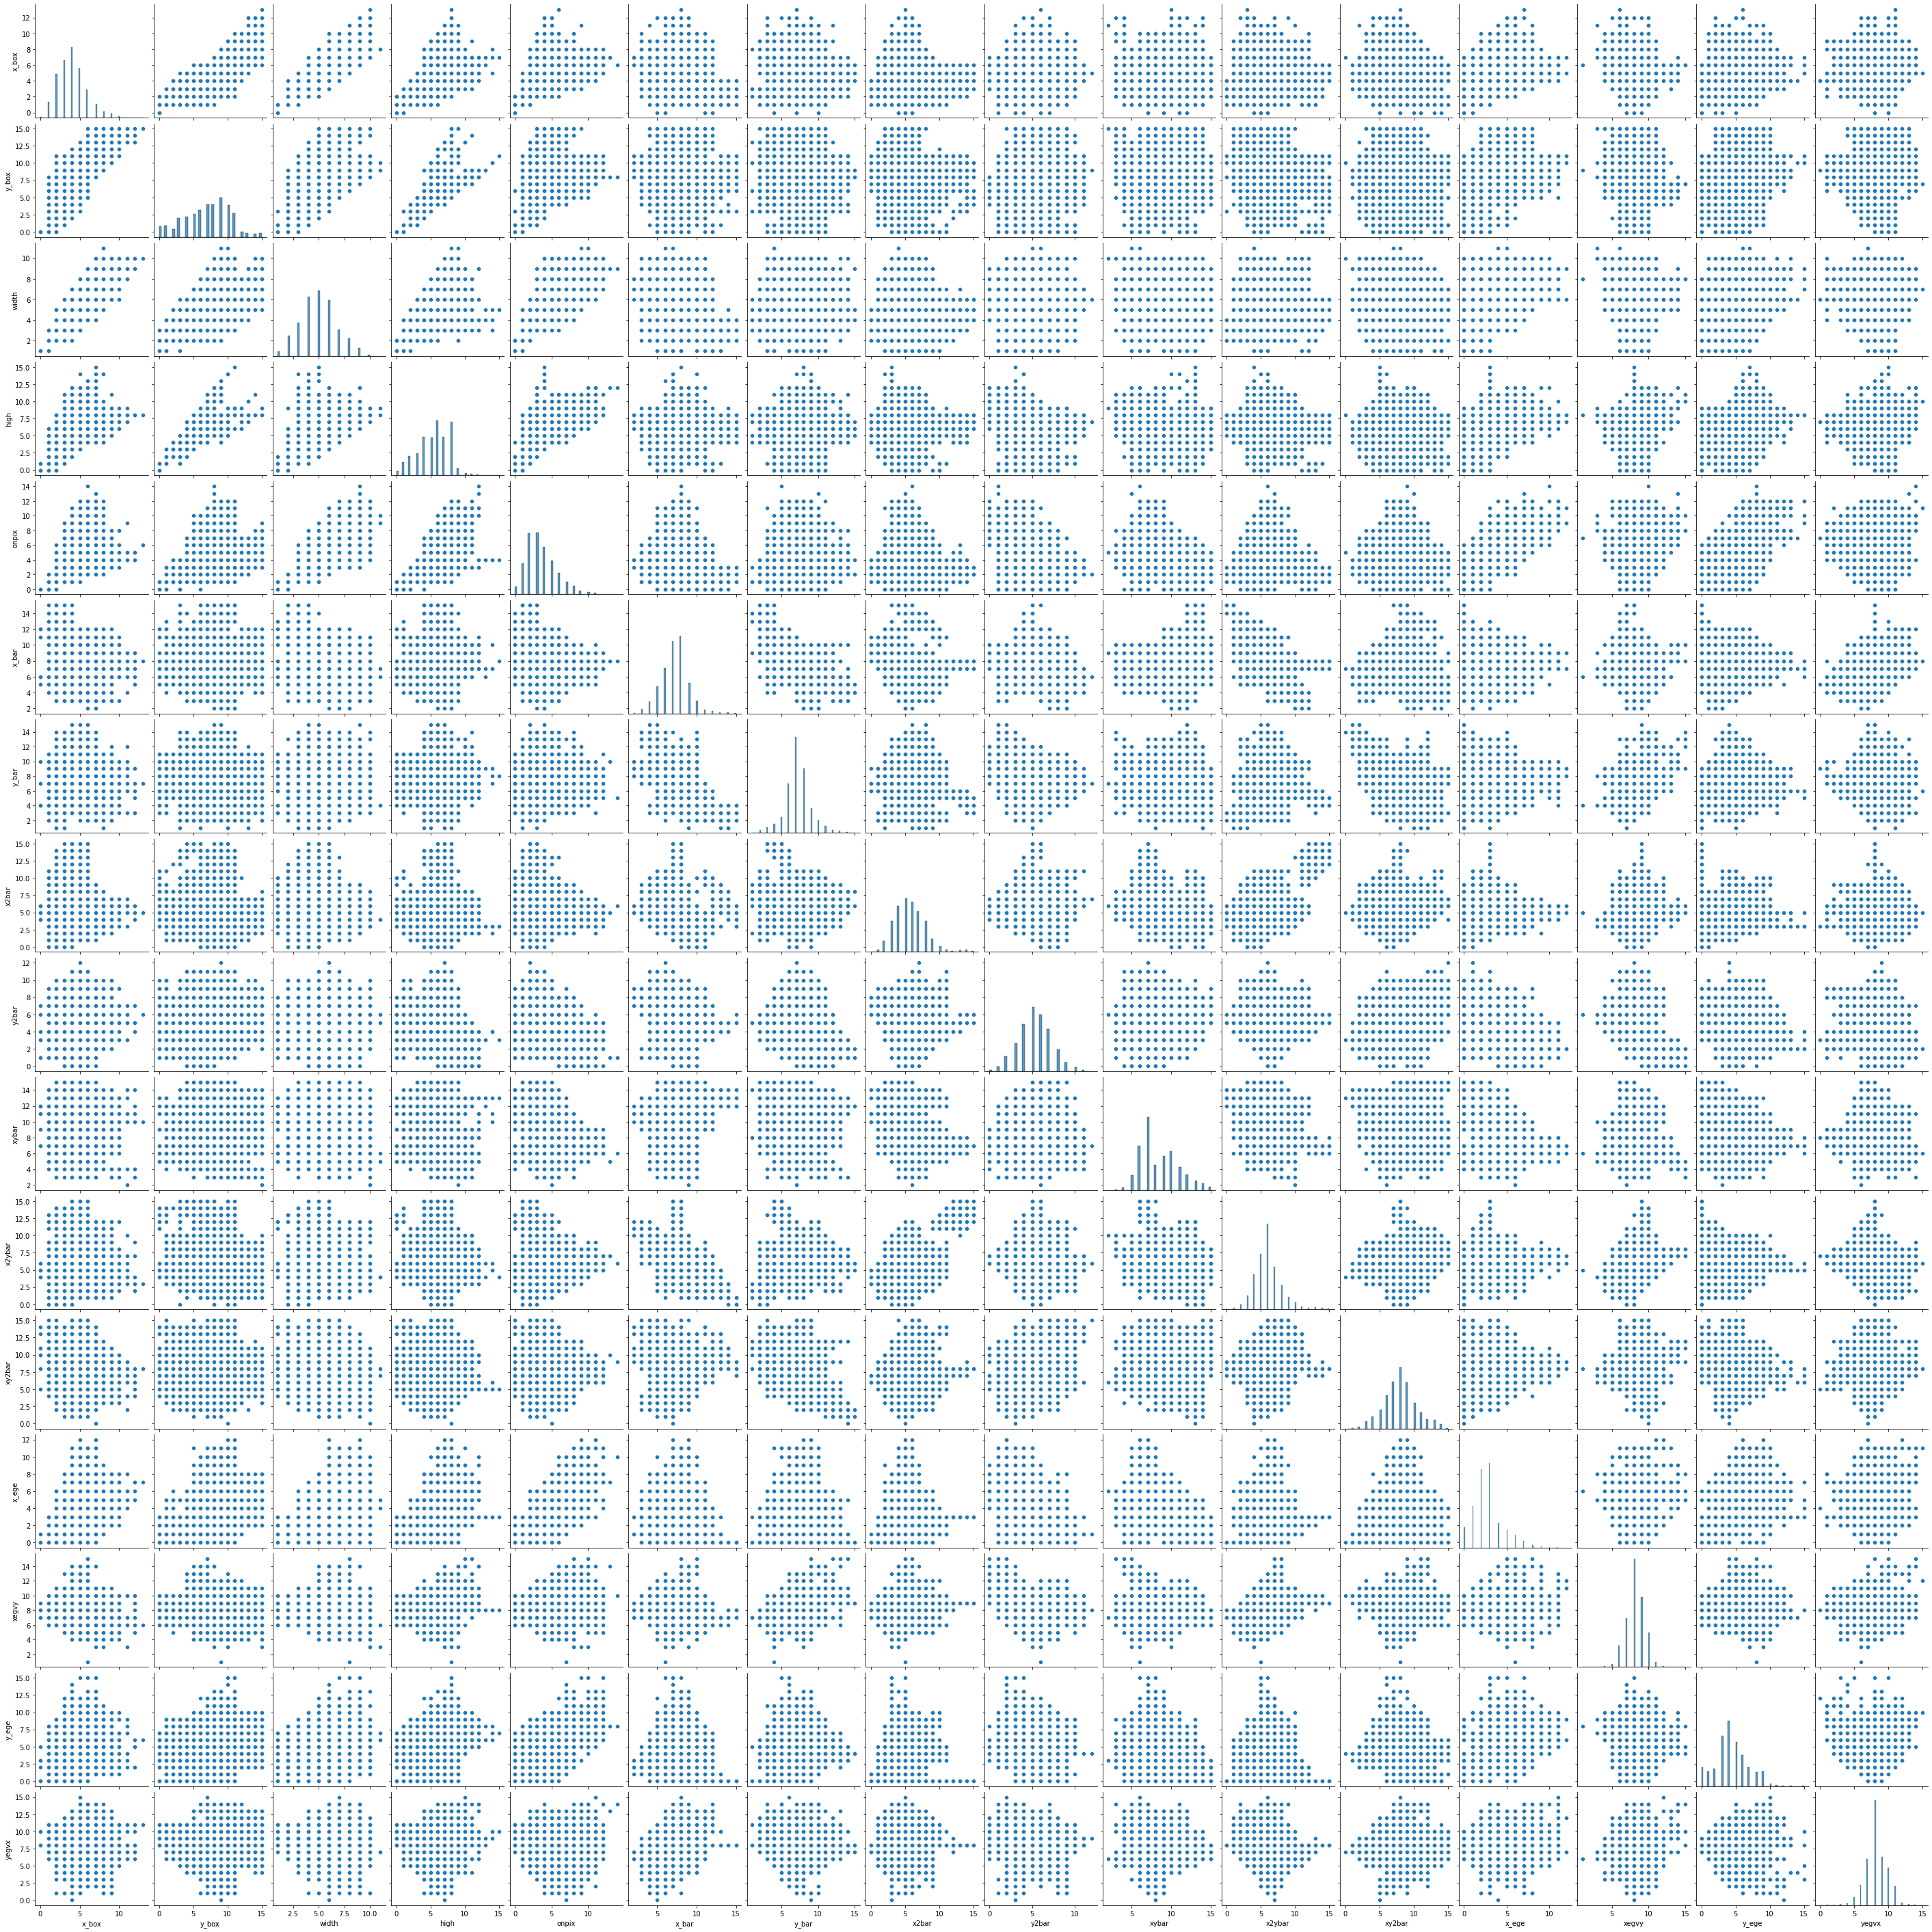

In [153]:
sns.pairplot(vars=num_list,data=df2)

Observation:
There is a specific pattern observed between 'x_box' and 'width'. As the 'x_bar' increases, 'y_bar' decreases. Also, it is observed that as the 'x_box' cost increases, 'width' also increases.

In [154]:
corr = df2.corr(method='pearson')
corr

x_box     y_box     width      high     onpix     x_bar     y_bar  \
x_box   1.000000  0.798361  0.847666  0.697221  0.595059 -0.088248 -0.013658   
y_box   0.798361  1.000000  0.718659  0.809358  0.573015  0.033264 -0.078191   
width   0.847666  0.718659  1.000000  0.716286  0.771586 -0.033856  0.017884   
high    0.697221  0.809358  0.716286  1.000000  0.676919  0.029176 -0.017603   
onpix   0.595059  0.573015  0.771586  0.676919  1.000000  0.053288  0.043997   
x_bar  -0.088248  0.033264 -0.033856  0.029176  0.053288  1.000000 -0.539552   
y_bar  -0.013658 -0.078191  0.017884 -0.017603  0.043997 -0.539552  1.000000   
x2bar  -0.044406 -0.027696 -0.119656  0.104256 -0.148785 -0.235935 -0.026569   
y2bar   0.099266  0.099485  0.123059  0.051529 -0.194917 -0.136889 -0.175041   
xybar   0.082618  0.154265  0.032148 -0.018234 -0.193152  0.169148 -0.009621   
x2ybar -0.018062 -0.107280 -0.045835 -0.015813 -0.075190 -0.476947  0.147606   
xy2bar -0.049609 -0.041178 -0.086446  0.028376 -0.122136 -0.041083 -0.340787   
x_ege   0.513209  0.386480  0.537379  0.369269  0.691781  0.025923 -0.064208   
xegvy   0.034615 -0.049043  0.026819  0.022793  0.060701 -0.319709  0.374225   
y_ege   0.310513  0.254178  0.302115  0.305601  0.500301 -0.022316  0.127259   
yegvx  -0.036651 -0.020354 -0.078228  0.007727 -0.042726  0.184645 -0.054614   

           x2bar     y2bar     xybar    x2ybar    xy2bar     x_ege     xegvy  \
x_box  -0.044406  0.099266  0.082618 -0.018062 -0.049609  0.513209  0.034615   
y_box  -0.027696  0.099485  0.154265 -0.107280 -0.041178  0.386480 -0.049043   
width  -0.119656  0.123059  0.032148 -0.045835 -0.086446  0.537379  0.026819   
high    0.104256  0.051529 -0.018234 -0.015813  0.028376  0.369269  0.022793   
onpix  -0.148785 -0.194917 -0.193152 -0.075190 -0.122136  0.691781  0.060701   
x_bar  -0.235935 -0.136889  0.169148 -0.476947 -0.041083  0.025923 -0.319709   
y_bar  -0.026569 -0.175041 -0.009621  0.147606 -0.340787 -0.064208  0.374225   
x2bar   1.000000  0.042149 -0.383676  0.409414  0.108725 -0.047446  0.111390   
y2bar   0.042149  1.000000  0.002803  0.035256  0.192728 -0.263171 -0.151650   
xybar  -0.383676  0.002803  1.000000 -0.177958 -0.073217 -0.279011 -0.025553   
x2ybar  0.409414  0.035256 -0.177958  1.000000  0.242231  0.036736  0.414763   
xy2bar  0.108725  0.192728 -0.073217  0.242231  1.000000 -0.049811 -0.094944   
x_ege  -0.047446 -0.263171 -0.279011  0.036736 -0.049811  1.000000  0.046281   
xegvy   0.111390 -0.151650 -0.025553  0.414763 -0.094944  0.046281  1.000000   
y_ege  -0.099705 -0.040599 -0.384214 -0.219296 -0.094435  0.333513  0.007753   
yegvx   0.108722 -0.033048 -0.126350 -0.223195  0.117389 -0.043688 -0.071802   

           y_ege     yegvx  
x_box   0.310513 -0.036651  
y_box   0.254178 -0.020354  
width   0.302115 -0.078228  
high    0.305601  0.007727  
onpix   0.500301 -0.042726  
x_bar  -0.022316  0.184645  
y_bar   0.127259 -0.054614  
x2bar  -0.099705  0.108722  
y2bar  -0.040599 -0.033048  
xybar  -0.384214 -0.126350  
x2ybar -0.219296 -0.223195  
xy2bar -0.094435  0.117389  
x_ege   0.333513 -0.043688  
xegvy   0.007753 -0.071802  
y_ege   1.000000  0.184823  
yegvx   0.184823  1.000000

<AxesSubplot:>

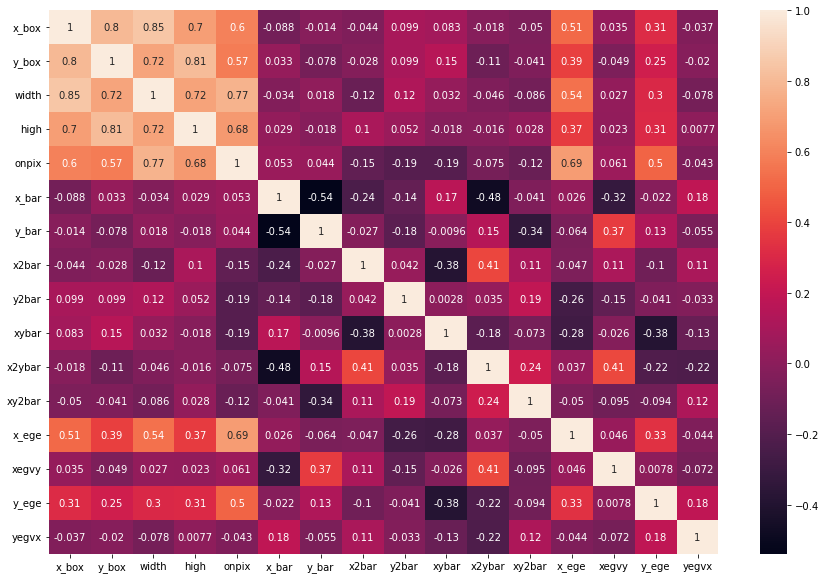

In [155]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr,data=df2, annot=True)

Observation
Correlation matrix gives us a similar representation as the pairplot.
We observe a positive correlation between 'x_box' and 'width' and a negative correlation between 'x_bar' and 'y_bar'.
Additionally, there is a strong negative correlation between 'x_bar' and 'x2ybar' thus showing multi-collinearity between the independent variables.

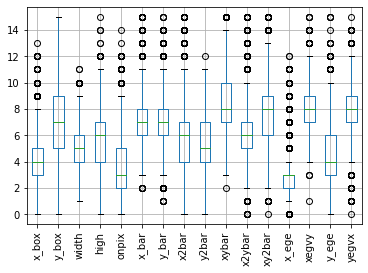

In [156]:
df2[num_list2].boxplot()
plt.xticks(rotation=90)
plt.show()

In [157]:
x2=df2.drop('lettr',axis=1)
y2=df2.lettr

In [158]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2,test_size=0.3, random_state=123)

In [159]:
X2_train.shape

(5939, 16)

In [160]:
X2_test.shape

(2546, 16)

In [161]:
X2_test.describe()

x_box        y_box        width         high        onpix  \
count  2546.000000  2546.000000  2546.000000  2546.000000  2546.000000   
mean      4.054595     7.116654     4.986646     5.497643     3.661822   
std       1.845018     3.333603     1.796257     2.309839     2.153430   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       3.000000     5.000000     4.000000     4.000000     2.000000   
50%       4.000000     7.000000     5.000000     6.000000     3.000000   
75%       5.000000    10.000000     6.000000     7.000000     5.000000   
max      12.000000    15.000000    10.000000    15.000000    14.000000   

             x_bar        y_bar        x2bar        y2bar        xybar  \
count  2546.000000  2546.000000  2546.000000  2546.000000  2546.000000   
mean      7.277298     7.232129     5.677533     5.260801     8.503928   
std       1.808105     1.817381     2.284848     1.930097     2.416094   
min       2.000000     1.000000     0.000000     0.000000     3.000000   
25%       6.000000     6.000000     4.000000     4.000000     7.000000   
50%       7.000000     7.000000     5.000000     5.000000     8.000000   
75%       8.000000     8.000000     7.000000     7.000000    10.000000   
max      15.000000    15.000000    15.000000    11.000000    15.000000   

            x2ybar       xy2bar        x_ege       xegvy        y_ege  \
count  2546.000000  2546.000000  2546.000000  2546.00000  2546.000000   
mean      6.103299     8.045169     2.791438     8.19128     4.374705   
std       2.094978     2.425779     1.819589     1.27879     2.366808   
min       1.000000     1.000000     0.000000     1.00000     0.000000   
25%       5.000000     7.000000     2.000000     7.00000     3.000000   
50%       6.000000     8.000000     3.000000     8.00000     4.000000   
75%       7.000000     9.000000     3.000000     9.00000     6.000000   
max      15.000000    15.000000    12.000000    15.00000    12.000000   

             yegvx  
count  2546.000000  
mean      8.261194  
std       1.644818  
min       0.000000  
25%       7.000000  
50%       8.000000  
75%       9.000000  
max      14.000000

In [162]:
sclr=StandardScaler()

In [163]:
X2_train[num_list2]=sclr.fit_transform(X2_train[num_list2])

In [164]:
X2_test[num_list2]=sclr.transform(X2_test[num_list2])

In [165]:
KNN2_model4=KNeighborsClassifier()
KNN2_model4.fit(X2_train,Y2_train)

KNeighborsClassifier()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


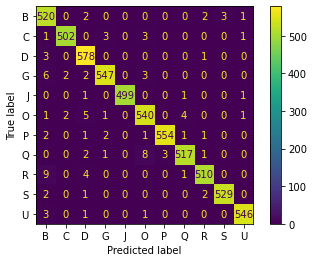

In [166]:
Y2_train_pred=KNN2_model4.predict(X2_train)
plot_confusion_matrix(KNN2_model4,X2_train,Y2_train)

In [167]:
print(classification_report(Y2_train,Y2_train_pred))

              precision    recall  f1-score   support

           B       0.95      0.98      0.97       528
           C       0.99      0.98      0.99       510
           D       0.97      0.99      0.98       582
           G       0.99      0.98      0.98       560
           J       1.00      0.99      1.00       502
           O       0.97      0.97      0.97       554
           P       0.99      0.99      0.99       562
           Q       0.99      0.97      0.98       532
           R       0.99      0.97      0.98       524
           S       0.99      0.99      0.99       534
           U       0.99      0.99      0.99       551

    accuracy                           0.98      5939
   macro avg       0.98      0.98      0.98      5939
weighted avg       0.98      0.98      0.98      5939



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


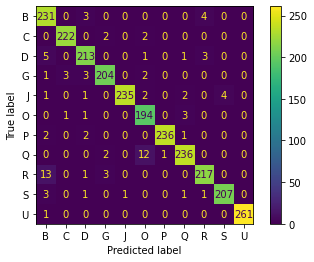

In [168]:
Y2_test_pred = KNN2_model4.predict(X2_test)
plot_confusion_matrix(KNN2_model4,X2_test,Y2_test)

In [169]:
print(classification_report(Y2_test,Y2_test_pred))

              precision    recall  f1-score   support

           B       0.90      0.97      0.93       238
           C       0.98      0.98      0.98       226
           D       0.95      0.96      0.95       223
           G       0.97      0.96      0.96       213
           J       1.00      0.96      0.98       245
           O       0.91      0.97      0.94       199
           P       1.00      0.98      0.99       241
           Q       0.97      0.94      0.95       251
           R       0.96      0.93      0.95       234
           S       0.98      0.97      0.97       214
           U       1.00      1.00      1.00       262

    accuracy                           0.96      2546
   macro avg       0.96      0.96      0.96      2546
weighted avg       0.97      0.96      0.96      2546



In [170]:
ac_scores=[]

for k in range(2,30,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train,Y2_train)
    scores = knn.score(X2_test,Y2_test)
    ac_scores.append(scores)

MCE = [1- x for x in ac_scores]
MCE

[0.04713275726630006,
 0.03692065985860171,
 0.03613511390416335,
 0.03809897879025925,
 0.03849175176747843,
 0.04241948153967012,
 0.04320502749410837,
 0.04595443833464252,
 0.04988216810683421,
 0.05302435192458754,
 0.06009426551453256,
 0.06362922230950507,
 0.06755695208169676,
 0.07109190887666927]

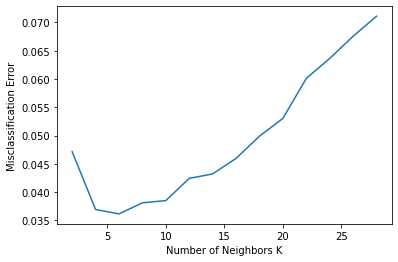

In [171]:
plt.plot(range(2,30,2),MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [172]:
KNN2_model5 = KNeighborsClassifier(n_neighbors=6)
KNN2_model5.fit(X2_train,Y2_train)

KNeighborsClassifier(n_neighbors=6)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


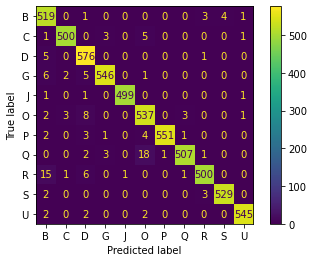

In [173]:
Y2_train_pred=KNN2_model5.predict(X2_train)
plot_confusion_matrix(KNN2_model5,X2_train,Y2_train)

In [174]:
print(classification_report(Y2_train,Y2_train_pred))

              precision    recall  f1-score   support

           B       0.94      0.98      0.96       528
           C       0.99      0.98      0.98       510
           D       0.95      0.99      0.97       582
           G       0.99      0.97      0.98       560
           J       1.00      0.99      1.00       502
           O       0.95      0.97      0.96       554
           P       1.00      0.98      0.99       562
           Q       0.99      0.95      0.97       532
           R       0.98      0.95      0.97       524
           S       0.99      0.99      0.99       534
           U       0.99      0.99      0.99       551

    accuracy                           0.98      5939
   macro avg       0.98      0.98      0.98      5939
weighted avg       0.98      0.98      0.98      5939



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


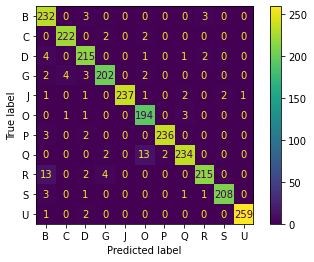

In [175]:
Y2_test_pred = KNN2_model5.predict(X2_test)
plot_confusion_matrix(KNN2_model5,X2_test,Y2_test)

In [176]:
print(classification_report(Y2_test,Y2_test_pred))

              precision    recall  f1-score   support

           B       0.90      0.97      0.93       238
           C       0.98      0.98      0.98       226
           D       0.93      0.96      0.95       223
           G       0.96      0.95      0.96       213
           J       1.00      0.97      0.98       245
           O       0.91      0.97      0.94       199
           P       0.99      0.98      0.99       241
           Q       0.97      0.93      0.95       251
           R       0.97      0.92      0.95       234
           S       0.99      0.97      0.98       214
           U       1.00      0.99      0.99       262

    accuracy                           0.96      2546
   macro avg       0.96      0.96      0.96      2546
weighted avg       0.97      0.96      0.96      2546



Conclusion:-
Overall accuracy of the built KNN regression model is at 96% on the test dataset.
Accuracy in train dataset is at 98% and test dataset is at 96%. As there is not much difference, there is no overfitting in the model.
Considering the evaluation, we can consider the above model as the final one.

In [177]:
svc4=SVC()

In [178]:
svc4.fit(X2_train,Y2_train)

SVC()

In [179]:
Y2_pred_train=svc4.predict(X2_train)
Y2_pred_test = svc4.predict(X2_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


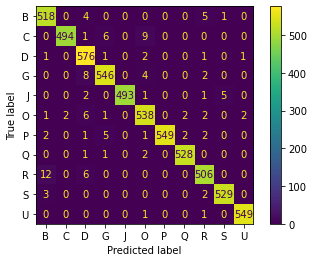

In [180]:
plot_confusion_matrix(svc4,X2_train,Y2_train)

In [181]:
print(classification_report(Y2_train,Y2_train_pred))

              precision    recall  f1-score   support

           B       0.94      0.98      0.96       528
           C       0.99      0.98      0.98       510
           D       0.95      0.99      0.97       582
           G       0.99      0.97      0.98       560
           J       1.00      0.99      1.00       502
           O       0.95      0.97      0.96       554
           P       1.00      0.98      0.99       562
           Q       0.99      0.95      0.97       532
           R       0.98      0.95      0.97       524
           S       0.99      0.99      0.99       534
           U       0.99      0.99      0.99       551

    accuracy                           0.98      5939
   macro avg       0.98      0.98      0.98      5939
weighted avg       0.98      0.98      0.98      5939



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


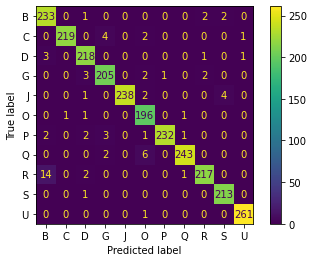

In [182]:
plot_confusion_matrix(svc4,X2_test,Y2_test)

In [183]:
print(classification_report(Y2_test,Y2_test_pred))

              precision    recall  f1-score   support

           B       0.90      0.97      0.93       238
           C       0.98      0.98      0.98       226
           D       0.93      0.96      0.95       223
           G       0.96      0.95      0.96       213
           J       1.00      0.97      0.98       245
           O       0.91      0.97      0.94       199
           P       0.99      0.98      0.99       241
           Q       0.97      0.93      0.95       251
           R       0.97      0.92      0.95       234
           S       0.99      0.97      0.98       214
           U       1.00      0.99      0.99       262

    accuracy                           0.96      2546
   macro avg       0.96      0.96      0.96      2546
weighted avg       0.97      0.96      0.96      2546



In [184]:
param_grid = {'kernel':['linear','rbf','poly'],'C':[0.001,0.1,1,10,100],'gamma':[0.0001,0.01,0.1,1,10]}
svc5 =  SVC(random_state=123)
grid_search = GridSearchCV(estimator=svc5,param_grid=param_grid,cv=10)

In [185]:
grid_search.fit(X2_train,Y2_train)

GridSearchCV(cv=10, estimator=SVC(random_state=123),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [186]:
grid_search.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [187]:
svc5=grid_search.best_estimator_

In [188]:
y2_pred_train=svc5.predict(X2_train)
y2_pred_test=svc5.predict(X2_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


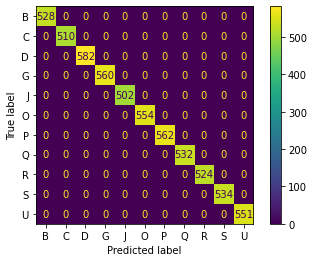

In [189]:
plot_confusion_matrix(svc5,X2_train,Y2_train)

In [190]:
print(classification_report(Y2_train,Y2_train_pred))

              precision    recall  f1-score   support

           B       0.94      0.98      0.96       528
           C       0.99      0.98      0.98       510
           D       0.95      0.99      0.97       582
           G       0.99      0.97      0.98       560
           J       1.00      0.99      1.00       502
           O       0.95      0.97      0.96       554
           P       1.00      0.98      0.99       562
           Q       0.99      0.95      0.97       532
           R       0.98      0.95      0.97       524
           S       0.99      0.99      0.99       534
           U       0.99      0.99      0.99       551

    accuracy                           0.98      5939
   macro avg       0.98      0.98      0.98      5939
weighted avg       0.98      0.98      0.98      5939



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


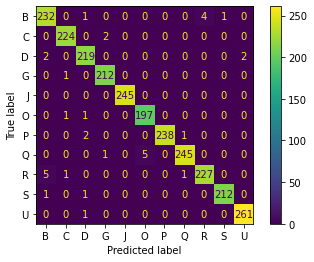

In [191]:
plot_confusion_matrix(svc5,X2_test,Y2_test)

In [192]:
print(classification_report(Y2_test,Y2_test_pred))

              precision    recall  f1-score   support

           B       0.90      0.97      0.93       238
           C       0.98      0.98      0.98       226
           D       0.93      0.96      0.95       223
           G       0.96      0.95      0.96       213
           J       1.00      0.97      0.98       245
           O       0.91      0.97      0.94       199
           P       0.99      0.98      0.99       241
           Q       0.97      0.93      0.95       251
           R       0.97      0.92      0.95       234
           S       0.99      0.97      0.98       214
           U       1.00      0.99      0.99       262

    accuracy                           0.96      2546
   macro avg       0.96      0.96      0.96      2546
weighted avg       0.97      0.96      0.96      2546



Conclusion:-
Overall accuracy of the built SVM regression model is at 96% on the test dataset.
Accuracy in train dataset is at 98% and test dataset is at 96%. As there is not much difference, there is no overfitting in the model.
Considering the evaluation, we can consider the above model as the final one.